---
![Pandas](https://raw.githubusercontent.com/pandas-dev/pandas/main/web/pandas/static/img/pandas.svg)
======

# 1 - Présentation de Pandas

**Pandas** s'appuie sur **NumPy** et apporte à Python la gestion de séries de données et de *data-frames*, lesquels correspondent aux tables de données que l'on peut trouver sur les outils de bases de données et tableurs.
Bien que **NumPy** soit une librairie performante en calcul numérique et matriciel, **Pandas** dispose des avantages suivants :

* Meilleure gestion des données hétérogènes (coexistence de colonnes numériques, textuelles ou calendaires).
* Meilleure gestion des données tabulaires avec des étiquettes de lignes et de colonnes
* Meilleure gestion des données temporelles ou séries chronologiques.
* Fonctionnalités étendues pour le nettoyage, la transformation et l'analyse de données.
* Intégration avec d'autres librairies de Data Science comme *Matplotlib*, *Seaborn*, *Plotly* ou *Altair* pour la visualisation de données et *scikit-learn* pour l'apprentissage automatique.
* Prise en charge de nombreux formats de fichiers (CSV, Excel, JSON, XML) ou d'accès aux bases de données en langage SQL.

**Pandas** dispose d'une [documentation]() très complète (en anglais).

Il est également possible de trouver une grande quantités de [références rapides et documentations abrégées](https://cheatography.com/tag/pandas/) (également en anglais) sur cette librairie.

L'institut de formation [DataCamp](www.datacamp.com) en met plusieurs à disposition en ligne :
* [Pandas Cheat Sheet for Data Science in Python](https://www.datacamp.com/cheat-sheet/pandas-cheat-sheet-for-data-science-in-python)
* [Pandas Cheat Sheet: Data Wrangling in Python](https://www.datacamp.com/cheat-sheet/pandas-cheat-sheet-data-wrangling-in-python)
* [Reshaping data with pandas in python](https://www.datacamp.com/cheat-sheet/reshaping-data-with-pandas-in-python)
* [Importing Data in Python Cheat Sheet](https://www.datacamp.com/cheat-sheet/importing-data-in-python-cheat-sheet)
* [Text data in python](https://www.datacamp.com/cheat-sheet/text-data-in-python-cheat-sheet)
* [Working with Dates and Times](https://www.datacamp.com/cheat-sheet/working-with-dates-and-times-in-python-cheat-sheet)


Le module **pandas** s'importe de manière recomandée avec l'alias **pd**

In [2]:
import pandas as pd
from pandas import Series, DataFrame # Series et DataFrame sont 2 structures de données mises à disposition par Pandas

## 1.1 - Les *Series*

Le conteneur *Series* est une tableau à une seule dimension de valeurs pouvant être dans l'un des types de donnés supportés par *Numpy*. La nouveauté est que ce tableau est associé à un tableau d'indices ou d'étiquettes appelé son *index*.


In [4]:
ma_serie = pd.Series([10,8,6,4,2])# création d'une série élémentaire à partir d'une liste de valeurs

In [5]:
print(ma_serie)       # Une séries est représentée par des indices à gauche et les valeurs associées à droite

0    10
1     8
2     6
3     4
4     2
dtype: int64


In [6]:
print(ma_serie.values) # comme pour un objet dictionary. la commande ".values" retourne les seules valeurs de la série 

[10  8  6  4  2]


In [7]:
print(ma_serie.index.values) # retourne les étiquettes de ma_serie

[0 1 2 3 4]


In [8]:
serie_indicee = pd.Series([4,3,2,1,0,-1,-2], index =['a','b','c','d','e','f','h']) # On crée la série en fournissant les étiquettes

In [9]:
print(serie_indicee) # La série complète

a    4
b    3
c    2
d    1
e    0
f   -1
h   -2
dtype: int64


In [10]:
print(serie_indicee.index) # Les seuls indices seront accessibles par <série>.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'h'], dtype='object')


In [11]:
print(serie_indicee.values) # et les seules valeurs par <série>.values

[ 4  3  2  1  0 -1 -2]


Les dispositif d'accès aux éléments de sous-ensembles de Numpy restent disponibles.

In [13]:
print(serie_indicee['a']) # Sélection d'une valeur par son indice.

4


In [14]:
serie_indicee['d'] = 9 # Modification d'une valeur spécifié par son indice (ou étiquete)
print(serie_indicee)

a    4
b    3
c    2
d    9
e    0
f   -1
h   -2
dtype: int64


In [15]:
serie_indicee[['a','b','c']] # On utilise l'extraction de sous ensemble de Numpy

a    4
b    3
c    2
dtype: int64

In [16]:
print(serie_indicee[serie_indicee>0]) # L'extraction par vecteur logique (généré par une condition)

a    4
b    3
c    2
d    9
dtype: int64


Le *braodcasting* de Numpy et sa vectorisation des calculs sont également disponibles.

In [18]:
print(serie_indicee *2) # multiplie par 2 chacun des élements de la série

a     8
b     6
c     4
d    18
e     0
f    -2
h    -4
dtype: int64


Les fonctions de *Numpy* sont applicables aux objets *Series* de *Pandas*.

In [20]:
import numpy as np
np.mean(serie_indicee) 

2.142857142857143

Test de présence d'un indice dans un objet *Series* s'effectue aussi simplement qu'avec un dictionnaire.

In [22]:
print('b' in serie_indicee) # vérifie la présence d'un indice
print('z' in serie_indicee)

True
False


En résulmé, les *Series* sont proches des dictionnaires Python tout en permettant d'utiliser tous les apports de Numpy sur leur données.

Il est bien entendu possible de dériver un objet *Series* d'un dictionnaire Python.

In [24]:
dictionnaire_structure_taux ={
'3 mois':-0.560106, '6 mois':-0.568624, 
'9 mois':-0.574400, 
'1 an':-0.577568, 
'2 ans':-0.566968, 
'3 ans':-0.525990, 
'4 ans':-0.463234, 
} 
serie_structure_taux = pd.Series(dictionnaire_structure_taux)# converting a dictionary to a series
print(serie_structure_taux) # the series has keys of a dictionary

3 mois   -0.560106
6 mois   -0.568624
9 mois   -0.574400
1 an     -0.577568
2 ans    -0.566968
3 ans    -0.525990
4 ans    -0.463234
dtype: float64


In [25]:
fraction_annees =[0.25,0.5,0.75,1,2,3,4] 
serie_structure_taux_2 =pd.Series(serie_structure_taux.values, index= fraction_annees)
print(serie_structure_taux_2) # Les indices ont été changés entre structure_taux et structure_taux_2

0.25   -0.560106
0.50   -0.568624
0.75   -0.574400
1.00   -0.577568
2.00   -0.566968
3.00   -0.525990
4.00   -0.463234
dtype: float64


Les séries ainsi que leurs indices ou étiquettes peuvent recevoir un titre ou une description (grâce à l'attribut *.name*)

In [27]:
serie_structure_taux.name = serie_structure_taux_2.name = "Structure des taux BCE, toutes obligations d'Etat, au 11/03/2021"
serie_structure_taux.index.name="Terme"
serie_structure_taux_2.index.name="Terme en fractions d'années"


Les séries s'interfacent très facilement avec des libraires de visualiation (ici matplotlib) qui seront présentées plus loin.

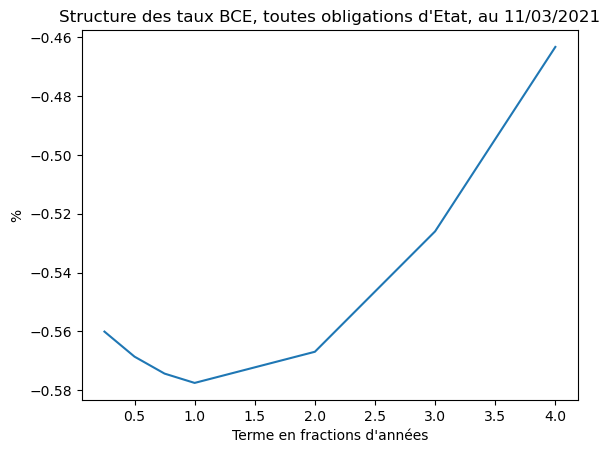

In [29]:
import matplotlib.pyplot as plt
plt.plot(serie_structure_taux_2)
plt.title(serie_structure_taux_2.name)
plt.xlabel(serie_structure_taux_2.index.name)
plt.ylabel('%')
plt.show()

## 1.2 - Le type *DataFrame*

Un data frame est une structure similaire à une feuille de calcul sur tableur ou encore à une table de base de données, constituée d'un ensemble ordonné de colonnes. Chaque colonne d'un dataframe est un objet _Series_. La nouveauté par rapport aux structures de données Numpy, c'est que chaque colonne peut avoir son propre type de données. Comme dans une feuille de calcul, les informations d'un *DataFrame* sont indicées tant en ligne qu'en colonne.

Cette proximité avec les feuilles de calcul permet à *Pandas* de proposer des fonctions d'[acquisition de données à partir de feuilles de calcul](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) telles que [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel),  [read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html#pandas.read_html) ou [read_json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html#pandas.read_json) pour des données Web ou encore [read_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html#pandas.read_table) et [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv) pour obtenir des données depuis un fichier texte.


La [documentation](https://pandas.pydata.org/pandas-docs/stable/) en anglais de Pandas est très complète et propose des [comparaisons avec d'autrs systèmes](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/index.html).



Les *DataFrame* de *Pandas* peuvent être créés à partir de conteneurs *Python*.

In [32]:
liste_obligations={ 'Emetteurs':['Société A','Société B','Société C','Société D'],
                    'type_coupon':['fixe','fixe','zero','fixe'],
                    'taux_coupon':[0.02,0.03,0.04,0.05],
                    'cours':[101.0,100.5,99.0,102.0]
                    }
obligations=DataFrame(liste_obligations, index=liste_obligations['Emetteurs'])
obligations

Emetteurs type_coupon  taux_coupon  cours
Société A  Société A        fixe         0.02  101.0
Société B  Société B        fixe         0.03  100.5
Société C  Société C        zero         0.04   99.0
Société D  Société D        fixe         0.05  102.0

Ils peuvent également être créés à partir de données sur fichier ou sur le Web.

In [34]:
try:
    cours_euro=pd.read_html('https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.fr.html')[0]
except:
    print('Téléchargement impossible, bascule sur anciennes données')
    cours_euro=pd.read_json('{"schema":{"fields":[{"name":"index","type":"integer"},{"name":"Currency","type":"string"},{"name":"Currency.1","type":"string"},{"name":"Spot","type":"number"},{"name":"Chart","type":"number"}],"primaryKey":["index"],"pandas_version":"1.4.0"},"data":[{"index":0,"Currency":"USD","Currency.1":"US dollar","Spot":1.1065,"Chart":null},{"index":1,"Currency":"JPY","Currency.1":"Japanese yen","Spot":157.81,"Chart":null},{"index":2,"Currency":"BGN","Currency.1":"Bulgarian lev","Spot":1.9558,"Chart":null},{"index":3,"Currency":"CZK","Currency.1":"Czech koruna","Spot":24.673,"Chart":null},{"index":4,"Currency":"DKK","Currency.1":"Danish krone","Spot":7.4549,"Chart":null},{"index":5,"Currency":"GBP","Currency.1":"Pound sterling","Spot":0.8683,"Chart":null},{"index":6,"Currency":"HUF","Currency.1":"Hungarian forint","Spot":381.63,"Chart":null},{"index":7,"Currency":"PLN","Currency.1":"Polish zloty","Spot":4.3308,"Chart":null},{"index":8,"Currency":"RON","Currency.1":"Romanian leu","Spot":4.9728,"Chart":null},{"index":9,"Currency":"SEK","Currency.1":"Swedish krona","Spot":11.066,"Chart":null},{"index":10,"Currency":"CHF","Currency.1":"Swiss franc","Spot":0.9438,"Chart":null},{"index":11,"Currency":"ISK","Currency.1":"Icelandic krona","Spot":150.7,"Chart":null},{"index":12,"Currency":"NOK","Currency.1":"Norwegian krone","Spot":11.2355,"Chart":null},{"index":13,"Currency":"TRY","Currency.1":"Turkish lira","Spot":32.5339,"Chart":null},{"index":14,"Currency":"AUD","Currency.1":"Australian dollar","Spot":1.617,"Chart":null},{"index":15,"Currency":"BRL","Currency.1":"Brazilian real","Spot":5.3434,"Chart":null},{"index":16,"Currency":"CAD","Currency.1":"Canadian dollar","Spot":1.4612,"Chart":null},{"index":17,"Currency":"CNY","Currency.1":"Chinese yuan renminbi","Spot":7.9086,"Chart":null},{"index":18,"Currency":"HKD","Currency.1":"Hong Kong dollar","Spot":8.6409,"Chart":null},{"index":19,"Currency":"IDR","Currency.1":"Indonesian rupiah","Spot":17060.29,"Chart":null},{"index":20,"Currency":"ILS","Currency.1":"Israeli shekel","Spot":4.0028,"Chart":null},{"index":21,"Currency":"INR","Currency.1":"Indian rupee","Spot":92.186,"Chart":null},{"index":22,"Currency":"KRW","Currency.1":"South Korean won","Spot":1432.67,"Chart":null},{"index":23,"Currency":"MXN","Currency.1":"Mexican peso","Spot":18.7422,"Chart":null},{"index":24,"Currency":"MYR","Currency.1":"Malaysian ringgit","Spot":5.122,"Chart":null},{"index":25,"Currency":"NZD","Currency.1":"New Zealand dollar","Spot":1.7483,"Chart":null},{"index":26,"Currency":"PHP","Currency.1":"Philippine peso","Spot":61.619,"Chart":null},{"index":27,"Currency":"SGD","Currency.1":"Singapore dollar","Spot":1.4628,"Chart":null},{"index":28,"Currency":"THB","Currency.1":"Thai baht","Spot":38.097,"Chart":null},{"index":29,"Currency":"ZAR","Currency.1":"South African rand","Spot":20.4288,"Chart":null}]}',orient='table')
cours_euro

Currency             Currency.1         Spot  Chart
0       USD              US dollar      1.08870    NaN
1       JPY           Japanese yen    161.17000    NaN
2       BGN          Bulgarian lev      1.95580    NaN
3       CZK           Czech koruna     24.81300    NaN
4       DKK           Danish krone      7.45750    NaN
5       GBP         Pound sterling      0.85825    NaN
6       HUF       Hungarian forint    381.53000    NaN
7       PLN           Polish zloty      4.36180    NaN
8       RON           Romanian leu      4.97760    NaN
9       SEK          Swedish krona     11.38000    NaN
10      CHF            Swiss franc      0.94590    NaN
11      ISK        Icelandic krona    148.90000    NaN
12      NOK        Norwegian krone     11.41000    NaN
13      TRY           Turkish lira     32.87060    NaN
14      AUD      Australian dollar      1.65000    NaN
15      BRL         Brazilian real      5.34440    NaN
16      CAD        Canadian dollar      1.46560    NaN
17      CNY  Chinese yuan renminbi      7.82910    NaN
18      HKD       Hong Kong dollar      8.51280    NaN
19      IDR      Indonesian rupiah  16991.83000    NaN
20      ILS         Israeli shekel      4.07210    NaN
21      INR           Indian rupee     90.44850    NaN
22      KRW       South Korean won   1451.99000    NaN
23      MXN           Mexican peso     18.64940    NaN
24      MYR      Malaysian ringgit      5.13590    NaN
25      NZD     New Zealand dollar      1.77980    NaN
26      PHP        Philippine peso     60.95600    NaN
27      SGD       Singapore dollar      1.45990    NaN
28      THB              Thai baht     38.60500    NaN
29      ZAR     South African rand     20.68920    NaN

Il est toujours possible d'ajouter de nouvelles colonnes à un *DataFrame*, à partir de conteneurs *Python* ou d'objet *Series* de *Pandas* :

In [36]:
obligations['Rating']=['AA+','AA-','AA','AA'] # ajout par position
maturites = Series([1,2,3,4], index=['Société D','Société C','Société B','Société A'])
obligations['maturité']=maturites # ajout selon les indices
obligations

Emetteurs type_coupon  taux_coupon  cours Rating  maturité
Société A  Société A        fixe         0.02  101.0    AA+         4
Société B  Société B        fixe         0.03  100.5    AA-         3
Société C  Société C        zero         0.04   99.0     AA         2
Société D  Société D        fixe         0.05  102.0     AA         1

Comme les séries, un  *DataFrame* et son indice peuvent avoir un titre ou une description (attribut *.name*)

In [38]:
obligations.name="Exemple de caractéristiques d'obligations"
obligations.index.name='Nom des sociétés'

Les *DataFrames* bénéficient des possibilités offertes en extraction de sous-ensembles et broadcasting et vectorisation des opérations.

In [40]:
taux_coupon_en_points_de_base=obligations['taux_coupon']*100
taux_coupon_en_points_de_base

Nom des sociétés
Société A    2.0
Société B    3.0
Société C    4.0
Société D    5.0
Name: taux_coupon, dtype: float64

La notation **\[ \]** permet d'accéder à une colonne du *DataFrame* :

In [42]:
obligations["cours"]

Nom des sociétés
Société A    101.0
Société B    100.5
Société C     99.0
Société D    102.0
Name: cours, dtype: float64

La notation **.loc\[\]** permet d'accéder, par leurs étiquettes à des sous-ensembles de lignes comme aux colonnes (ou les deux à la fois)

In [44]:
obligations.loc[['Société B','Société D'],:]

Emetteurs type_coupon  taux_coupon  cours Rating  maturité
Nom des sociétés                                                            
Société B         Société B        fixe         0.03  100.5    AA-         3
Société D         Société D        fixe         0.05  102.0     AA         1

In [45]:
obligations.loc[:,['cours','maturité']]

cours  maturité
Nom des sociétés                 
Société A         101.0         4
Société B         100.5         3
Société C          99.0         2
Société D         102.0         1

La notation **.iloc\[\]** permet d'accéder, par position à des sous-ensembles de lignes comme aux colonnes (ou les deux à la fois)

In [47]:
obligations.iloc[:,1:3]

type_coupon  taux_coupon
Nom des sociétés                         
Société A               fixe         0.02
Société B               fixe         0.03
Société C               zero         0.04
Société D               fixe         0.05

In [48]:
obligations.iloc[1:3,:]

Emetteurs type_coupon  taux_coupon  cours Rating  maturité
Nom des sociétés                                                            
Société B         Société B        fixe         0.03  100.5    AA-         3
Société C         Société C        zero         0.04   99.0     AA         2

# 2 - Import/Export de données sous Pandas

| Format de fichier | Fonction en Pandas       | Description                                              | Lien vers la documentation                                 |
|-------------------|--------------------------|----------------------------------------------------------|------------------------------------------------------------|
| CSV               | `pd.read_csv()`          | Fichiers texte séparés par des virgules ou autres délimiteurs. | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) |
| JSON              | `pd.read_json()`         | Fichiers de données structurées au format JSON.          | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html) |
| Excel             | `pd.read_excel()`        | Fichiers Excel (.xlsx, .xls).                            | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) |
| HDF               | `pd.read_hdf()`          | Fichiers au format HDF5, un format de données hiérarchique. | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_hdf.html) |
| SQL               | `pd.read_sql()`          | Lecture de données depuis une base de données SQL.       | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html) |
| Parquet           | `pd.read_parquet()`      | Format de fichier colonne-stockage de l'écosystème Hadoop. | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_parquet.html) |
| Feather           | `pd.read_feather()`      | Format binaire léger pour stocker des dataframes.        | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_feather.html) |
| Stata             | `pd.read_stata()`        | Fichiers de données au format Stata.                     | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_stata.html) |
| SAS               | `pd.read_sas()`          | Fichiers de données au format SAS.                       | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sas.html) |
| SPSS              | `pd.read_spss()`         | Fichiers de données au format SPSS.                      | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_spss.html) |
| MsgPack           | `pd.read_msgpack()`      | (Obsolète) Format de sérialisation binaire basé sur JSON. | [Lien](https://pandas.pydata.org/pandas-docs/version/0.25.3/reference/api/pandas.read_msgpack.html) |
| Clipboard         | `pd.read_clipboard()`    | Lit le contenu du presse-papiers comme un dataframe.     | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_clipboard.html) |
| HTML              | `pd.read_html()`         | Lit les tables HTML dans une liste de DataFrames.        | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html) |
| Google BigQuery   | `pd.read_gbq()`          | Lit les données depuis Google BigQuery.                  | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_gbq.html) |
| ORC               | `pd.read_orc()`          | Format de fichier colonne-stockage utilisé dans l'écosystème Hadoop. | [Lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_orc.html) |


## 2.1 - Lecture données au format CSV

Il s'agit d'un fichier texte utilisant un séparateur (virgule par défaut, sinon point virgule ou tabulation) pour représenter les changement de colonnes.
Exemple à partir de [_Yahoo finance_](https://fr.finance.yahoo.com/quote/TSLA)

In [51]:
# URL du fichier CSV des données historiques d'une action (par exemple, TSLA pour Tesla)
ticker='TSLA'
url = "https://query1.finance.yahoo.com/v7/finance/download/"+ticker+"?period1=0&period2=2632700800&interval=1d&events=history"
cours_tesla = pd.read_csv(url,sep=",")
cours_tesla.tail()

Date        Open        High         Low       Close   Adj Close  \
3408  2024-01-12  220.080002  225.339996  217.149994  218.889999  218.889999   
3409  2024-01-16  215.100006  223.490005  212.179993  219.910004  219.910004   
3410  2024-01-17  214.860001  215.669998  212.009995  215.550003  215.550003   
3411  2024-01-18  216.880005  217.449997  208.740005  211.880005  211.880005   
3412  2024-01-19  209.990005  213.190002  207.559998  212.190002  212.190002   

         Volume  
3408  122889000  
3409  115355000  
3410  103164400  
3411  108595400  
3412  102095800

## 2.2 - Lecture de fichiers Excel

Par défaut, le fonction [_read_excel()_](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html) lit les données de la première feuille. Mais il est toutefois possible, via ses arguments, de spécifier la feuille ou la plage de données source.

Identification des sociétés financières sur le site [www.iso20022.org](https://www.iso20022.org/market-identifier-codes)

In [53]:
pd.read_excel('https://www.iso20022.org/sites/default/files/ISO10383_MIC/ISO10383_MIC.xlsx',
             sheet_name='ISO10383_MIC', # Facultatif : nom de la feuille ou son indice à partir de zéro
             ).head()

MIC OPERATING MIC OPRT/SGMT MARKET NAME-INSTITUTION DESCRIPTION  \
0  3579          3579      OPRT   SSY FUTURES LTD -  FREIGHT SCREEN   
1  24EX          24EX      OPRT                         24 EXCHANGE   
2  360T          360T      OPRT                                360T   
3  360X          360X      OPRT                                360X   
4  4AXE          4AXE      OPRT         4 AFRICA EXCHANGE (PTY) LTD   

         LEGAL ENTITY NAME                   LEI MARKET CATEGORY CODE ACRONYM  \
0                      NaN  213800RGYOAL3KL2XL02                 NSPD     NaN   
1                      NaN  213800YXBUZH7G3NDC51                 NSPD    24EX   
2  360 TREASURY SYSTEMS AG  529900P0204W9HA8JP36                 MLTF     NaN   
3                  360X AG  529900M42L36KXZ1JD69                 MLTF     NaN   
4                      NaN  378900CCCF6D95AECA88                 RMKT     NaN   

  ISO COUNTRY CODE (ISO 3166)                CITY             WEBSITE  STATUS  \
0                          GB              LONDON   WWW.SSYONLINE.COM  ACTIVE   
1                          BM             BERMUDA  WWW.24EXCHANGE.NET  ACTIVE   
2                          DE           FRANKFURT        WWW.360T.COM  ACTIVE   
3                          DE           FRANKFURT        WWW.360X.COM  ACTIVE   
4                          ZA  BRYANSTON, SANDTON       WWW.4AX.CO.ZA  ACTIVE   

   CREATION DATE  LAST UPDATE DATE  LAST VALIDATION DATE  EXPIRY DATE  \
0       20170724          20170724                   NaN          NaN   
1       20190923          20190923                   NaN          NaN   
2       20070924          20231127            20230828.0          NaN   
3       20231127          20231127            20231127.0          NaN   
4       20190422          20190422                   NaN          NaN   

                                            COMMENTS  
0  TRADING SCREEN FOR FORWARD FREIGHT AGREEMENTS ...  
1                     FOREIGN EXCHANGE AND EQUITIES.  
2                                                NaN  
3                                                NaN  
4                                                NaN

## 2.3 - Lecture de fichier XML

Les fichiers XML sont généralement utilisés pour des données structurées de référence, notamment produites par des administrations (AMF, BCE, Eurostat, OCDE, données opendata des ministères et administrations). De plus en plus d'acteurs se tournent vers le format JSON, plus compact.  
Un fichier XML pouvant contenir des données de toute structure, la sélection des données pertinentes s'effectue à l'aide du langaee déclaratif [_xpath_.](https://developer.mozilla.org/fr/docs/Web/XPath)

Exemple : Obtention des taux de change courants de l'Euro sur le site de la BCE.

In [55]:
taux_change_bce=pd.read_xml('https://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml',
            xpath='//*[@currency]' # On selectionne seulement les champs présentant un attribut Currency
            )
taux_change_bce.head()

currency      rate
0      USD    1.0887
1      JPY  161.1700
2      BGN    1.9558
3      CZK   24.8130
4      DKK    7.4575

## 2.4- Lecture de données au format JSON
Le format JSON (JavaScript Object Notation) est un standard de l'échange de données entre serveurs web et applications clients s'exécutant en langage javascript sur le navigateur de l'utilisateur.

Lecture de cours intraday sur le CAC 40 depuis le site _Boursorama_.
La date de cotation _d_ est formée de 2 chiffres pour l'année, 2 chiffres pour le mois, 2 chiffres pour le jour, 4 chiffres représentant l'heure sous forme du nombre de minutes après minuit.

In [57]:
dict=pd.read_json('https://www.boursorama.com/bourse/action/graph/ws/GetTicksEOD?symbol=1rPCAC',orient='index')['QuoteTab']
cours_cac_40_boursorama=pd.DataFrame(dict['d'])
cours_cac_40_boursorama.tail()

d        o        h        l        c  v
515  2401191055  7369.79  7371.64  7369.79  7371.64  0
516  2401191056  7371.64  7371.64  7371.64  7371.64  0
517  2401191057  7371.64  7371.64  7371.64  7371.64  0
518  2401191058  7371.64  7371.64  7371.64  7371.64  0
519  2401191059  7371.64  7371.64  7371.64  7371.64  0

CAC 40 sur [_Euronext_](https://live.euronext.com/en/product/indices/FR0003500008-XPAR) en quotidien puis intraday

In [59]:
cours_cac_40_euronext=pd.read_json('https://live.euronext.com/intraday_chart/getChartData/FR0003500008-XPAR/max')
cours_cac_40_euronext.tail()

time    price  volume
9153  2024-01-15 01:00  7411.68       0
9154  2024-01-16 01:00  7398.00       0
9155  2024-01-17 01:00  7318.69       0
9156  2024-01-18 01:00  7401.35       0
9157  2024-01-19 01:00  7371.64       0

In [60]:
pd.read_json('https://live.euronext.com/intraday_chart/getChartData/FR0003500008-XPAR/intraday').tail()

time    price  volume
2566  2024-01-19 17:29  7369.68       0
2567  2024-01-19 17:30  7369.79       0
2568  2024-01-19 17:35  7371.64       0
2569  2024-01-19 18:00  7371.64       0
2570  2024-01-19 18:05  7371.64       0

## 2.5 - Lecture des tableaux d'une page Web au format HTML
Lorsqu'uen page web présente un tableau, elle le présente en suivant le langage [HTML](https://developer.mozilla.org/fr/docs/Web/HTML).
**Pandas** peut déchiffrer ce langage au sein d'une page web pour retrouver la liste des tableaux contenus en son sein : la fonction _read_html()_ retournera donc une liste, éventuellement vide si aucun tableau n'a été trouvé dans la page.

Lecture de taux de change de l'euro sur le site [_x-rates.com_](https://www.x-rates.com/table/?from=EUR&amount=1)

In [62]:
taux_change=pd.read_html('https://www.x-rates.com/table/?from=EUR&amount=1')[1]
taux_change.head()

Euro    1.00 EUR  inv. 1.00 EUR
0     Argentine Peso  893.645628       0.001119
1  Australian Dollar    1.654201       0.604521
2     Bahraini Dinar    0.410175       2.437984
3      Botswana Pula   14.883992       0.067186
4     Brazilian Real    5.375541       0.186028

## 2.6 - Accès SQL à des bases de données
Le monde des bases  de données relationnelles (Oracle, IBM DB2, Microsoft SQL Server, Microsoft Access, OpenOffice Base, MySql, PostgreSQL,...) est accessible au travers du langage [SQL](https://sql.sh).
Pour accéder à une base de données SQL, la démarche suit 3 étapes :
1. Obtention d'une connexion avec la base de données, qui requiert l'importation d'une fonction dans un module dédié au moteur de base de données ciblé puis la fourniture éventuelle d'identifiants d'accès à la base de donnée.
2. Envoi de commandes SQL à la base pour actualiser ou obtenir les données.
3. Fermeture de la connexion.

Démonstration ci-dessous avec une base de données SQLite qui a la particularité d'avoir son serveur embarqué dans le système qui l'appelle.

In [64]:
import sqlite3

# Etape 1 - Création d'une base de données SQLite ou accès si son fichier existe déja, et obtention d'une connexion
connexion = sqlite3.connect("base_de_donnees")

# Etape 2 - Opérations sur la base

# On écrit les données d'un dataframe dans une table de la base de données
cours_tesla.to_sql("tesla", #Nom de la table recevant les données
                   connexion, #connexion au serveur de base de données
                   if_exists="replace")

# On relit les données dans un nouveau dafaframe
cours_tesla2=pd.read_sql('select * from tesla', # commande SQL demandant toute les données d ela table tesla
                         connexion # connexion au serveur de base de données
                        )
#Etape 3 - Fermeture de la connexion
connexion.close()

cours_tesla2.tail()

index        Date        Open        High         Low       Close  \
3408   3408  2024-01-12  220.080002  225.339996  217.149994  218.889999   
3409   3409  2024-01-16  215.100006  223.490005  212.179993  219.910004   
3410   3410  2024-01-17  214.860001  215.669998  212.009995  215.550003   
3411   3411  2024-01-18  216.880005  217.449997  208.740005  211.880005   
3412   3412  2024-01-19  209.990005  213.190002  207.559998  212.190002   

       Adj Close     Volume  
3408  218.889999  122889000  
3409  219.910004  115355000  
3410  215.550003  103164400  
3411  211.880005  108595400  
3412  212.190002  102095800

## 2.7 - Bases de données Google Big-Query
En matière financière Google [héberge](https://console.cloud.google.com/marketplace/browse?filter=solution-type:dataset&filter=price:free&hl=fr) de nombreuse s la base des déclarations de résultats auprès de la SEC ainsi que les blockhain des principales cryptomonnaies. Avec un compte google, il est possible de créer un nouveau projet dans la console Cloud de Google puis de l'utiliser sous Pandas pour consulter ces données.
Ici la structure d'une requête qui extrait les codes de secteurs du jeu de données public _sec_quarterly_financials_.

In [66]:
try:
    sic_big_query=pd.read_gbq('''SELECT
                                      *
                                    FROM
                                      `bigquery-public-data.sec_quarterly_financials.sic_codes`
                                    LIMIT
                                      1000''', 
    dialect="standard",
    project_id='votre id projet') # Indiquer un projet big Query créé sur les serveurs cloud de Google
except Exception :
    print('Module pandas-gbq non installé, conflit de modules, projet Big Query ou authentification google non réalisés, remplacement par un résultat-type.')
    sic_big_query=pd.read_json('{"sic_code":{"0":"6399","1":"2835","2":"6321","3":"6361","4":"6311","5":"6411","6":"6324","7":"6351","8":"2834","9":"2836","10":"2833","11":"6331","12":"5094","13":"5099","14":"5900","15":"5140","16":"5331","17":"5040","18":"5944","19":"5700","20":"5190","21":"2250","22":"3873","23":"5961","24":"5531","25":"5141","26":"4961","27":"2211","28":"4941","29":"2221","30":"5000","31":"5311","32":"5945","33":"4923","34":"5990","35":"5940","36":"4900","37":"4991","38":"5412","39":"5020","40":"3911","41":"4931","42":"3910","43":"5731","44":"2273","45":"5712","46":"5271","47":"5500","48":"5090","49":"4924","50":"5960","51":"5411","52":"5735","53":"5399","54":"5734","55":"4911","56":"5400","57":"4922","58":"4932","59":"2200","60":"7372","61":"7370","62":"3576","63":"3571","64":"3570","65":"3575","66":"3578","67":"3572","68":"3577","69":"3579","70":"6794","71":"3672","72":"7377","73":"5045","74":"7373","75":"7374","76":"7371","77":"5110","78":"2020","79":"2070","80":"2600","81":"2092","82":"2000","83":"2911","84":"4610","85":"5172","86":"2060","87":"6792","88":"2040","89":"1389","90":"3533","91":"2090","92":"1311","93":"1381","94":"5171","95":"2670","96":"2033","97":"2621","98":"2650","99":"2052","100":"2030","101":"2050","102":"1382","103":"2611","104":"2024","105":"2631","106":"3716","107":"2731","108":"5812","109":"700","110":"4700","111":"4400","112":"3931","113":"2750","114":"2771","115":"7500","116":"2100","117":"3812","118":"2741","119":"3751","120":"5051","121":"5013","122":"100","123":"4210","124":"2011","125":"3730","126":"4231","127":"7900","128":"7812","129":"3949","130":"4011","131":"4512","132":"2013","133":"4220","134":"2732","135":"7819","136":"4731","137":"2711","138":"7822","139":"4581","140":"3743","141":"7829","142":"4513","143":"4013","144":"7997","145":"7948","146":"200","147":"5010","148":"7990","149":"7841","150":"3715","151":"900","152":"4213","153":"3724","154":"3942","155":"2790","156":"3790","157":"5150","158":"4522","159":"3720","160":"3728","161":"2870","162":"2780","163":"8600","164":"5050","165":"4412","166":"2015","167":"3721","168":"800","169":"3711","170":"4100","171":"2721","172":"7510","173":"5810","174":"3760","175":"7830","176":"3714","177":"2111","178":"2761","179":"3944","180":"3713","181":"3241","182":"3412","183":"8700","184":"3451","185":"3411","186":"3567","187":"3310","188":"5072","189":"3231","190":"2810","191":"3585","192":"3452","193":"3081","194":"3990","195":"1600","196":"2430","197":"3086","198":"2452","199":"3562","200":"2890","201":"5200","202":"3060","203":"3221","204":"3442","205":"8711","206":"3312","207":"3011","208":"3470","209":"3080","210":"5084","211":"3590","212":"3960","213":"2451","214":"2421","215":"2522","216":"3569","217":"1700","218":"3443","219":"3433","220":"2891","221":"2520","222":"3317","223":"3350","224":"4955","225":"3270","226":"3440","227":"2820","228":"3290","229":"2531","230":"3281","231":"5082","232":"2540","233":"5080","234":"1520","235":"1731","236":"3211","237":"3460","238":"3050","239":"3420","240":"2990","241":"1623","242":"3272","243":"2400","244":"3341","245":"3320","246":"5031","247":"2800","248":"3480","249":"2842","250":"3357","251":"1531","252":"3260","253":"2840","254":"3021","255":"3250","256":"3444","257":"4953","258":"4950","259":"3564","260":"3390","261":"3490","262":"3580","263":"2844","264":"2673","265":"2851","266":"7350","267":"3089","268":"7359","269":"1540","270":"2510","271":"2821","272":"2590","273":"5211","274":"3360","275":"2950","276":"2511","277":"5160","278":"5070","279":"8744","280":"3430","281":"3220","282":"2860","283":"3448","284":"5030","285":"6141","286":"6022","287":"6159","288":"6200","289":"6035","290":"6172","291":"6021","292":"6282","293":"6163","294":"6162","295":"6036","296":"6199","297":"6099","298":"6029","299":"6111","300":"6153","301":"6211","302":"8742","303":"6221","304":"6799","305":"7011","306":"7000","307":"6798","308":"6519","309":"7361","310":"6512","311":"7340","312":"6531","313":"6500","314":"8741","315":"6532","316":"6510","317":"6552","318":"6513","319":"2253","320":"8734","321":"5130","322":"8082","323":"8090","324":"3950","325":"3334","326":"5661","327":"2320","328":"6795","329":"5122","330":"5600","331":"2300","332":"1000","333":"8000","334":"1040","335":"5180","336":"5621","337":"1220","338":"1090","339":"2340","340":"2080","341":"2330","342":"5912","343":"5651","344":"1400","345":"8351","346":"3330","347":"8300","348":"3140","349":"2082","350":"8731","351":"3100","352":"8071","353":"5047","354":"1221","355":"2390","356":"2086","357":"3612","358":"3842","359":"3523","360":"3678","361":"3677","362":"3550","363":"5065","364":"3826","365":"3620","366":"3537","367":"3861","368":"5063","369":"3690","370":"3524","371":"3531","372":"3829","373":"3821","374":"3555","375":"3679","376":"3822","377":"3824","378":"3600","379":"3670","380":"5064","381":"3851","382":"3844","383":"3843","384":"3541","385":"3823","386":"3841","387":"3560","388":"3530","389":"3621","390":"3532","391":"3613","392":"3559","393":"3825","394":"3827","395":"3510","396":"3540","397":"3674","398":"3561","399":"3845","400":"8062","401":"7384","402":"8060","403":"3651","404":"4899","405":"3630","406":"3663","407":"4813","408":"7320","409":"7200","410":"4841","411":"7330","412":"8900","413":"8051","414":"7363","415":"3640","416":"4812","417":"8093","418":"3652","419":"4822","420":"7380","421":"4832","422":"7310","423":"3669","424":"7311","425":"8011","426":"7600","427":"3695","428":"3634","429":"7381","430":"8200","431":"3661","432":"4833","433":"8050","434":"7385","435":"8111","436":"7331","437":"8888","438":"9721","439":"8880","440":"6770","441":"9995","442":"6189","443":"7389"},"ad_office":{"0":"1","1":"1","2":"1","3":"1","4":"1","5":"1","6":"1","7":"1","8":"1","9":"1","10":"1","11":"1","12":"2","13":"2","14":"2","15":"2","16":"2","17":"2","18":"2","19":"2","20":"2","21":"2","22":"2","23":"2","24":"2","25":"2","26":"2","27":"2","28":"2","29":"2","30":"2","31":"2","32":"2","33":"2","34":"2","35":"2","36":"2","37":"2","38":"2","39":"2","40":"2","41":"2","42":"2","43":"2","44":"2","45":"2","46":"2","47":"2","48":"2","49":"2","50":"2","51":"2","52":"2","53":"2","54":"2","55":"2","56":"2","57":"2","58":"2","59":"2","60":"3","61":"3","62":"3","63":"3","64":"3","65":"3","66":"3","67":"3","68":"3","69":"3","70":"3","71":"3","72":"3","73":"3","74":"3","75":"3","76":"3","77":"4","78":"4","79":"4","80":"4","81":"4","82":"4","83":"4","84":"4","85":"4","86":"4","87":"4","88":"4","89":"4","90":"4","91":"4","92":"4","93":"4","94":"4","95":"4","96":"4","97":"4","98":"4","99":"4","100":"4","101":"4","102":"4","103":"4","104":"4","105":"4","106":"5","107":"5","108":"5","109":"5","110":"5","111":"5","112":"5","113":"5","114":"5","115":"5","116":"5","117":"5","118":"5","119":"5","120":"5","121":"5","122":"5","123":"5","124":"5","125":"5","126":"5","127":"5","128":"5","129":"5","130":"5","131":"5","132":"5","133":"5","134":"5","135":"5","136":"5","137":"5","138":"5","139":"5","140":"5","141":"5","142":"5","143":"5","144":"5","145":"5","146":"5","147":"5","148":"5","149":"5","150":"5","151":"5","152":"5","153":"5","154":"5","155":"5","156":"5","157":"5","158":"5","159":"5","160":"5","161":"5","162":"5","163":"5","164":"5","165":"5","166":"5","167":"5","168":"5","169":"5","170":"5","171":"5","172":"5","173":"5","174":"5","175":"5","176":"5","177":"5","178":"5","179":"5","180":"5","181":"6","182":"6","183":"6","184":"6","185":"6","186":"6","187":"6","188":"6","189":"6","190":"6","191":"6","192":"6","193":"6","194":"6","195":"6","196":"6","197":"6","198":"6","199":"6","200":"6","201":"6","202":"6","203":"6","204":"6","205":"6","206":"6","207":"6","208":"6","209":"6","210":"6","211":"6","212":"6","213":"6","214":"6","215":"6","216":"6","217":"6","218":"6","219":"6","220":"6","221":"6","222":"6","223":"6","224":"6","225":"6","226":"6","227":"6","228":"6","229":"6","230":"6","231":"6","232":"6","233":"6","234":"6","235":"6","236":"6","237":"6","238":"6","239":"6","240":"6","241":"6","242":"6","243":"6","244":"6","245":"6","246":"6","247":"6","248":"6","249":"6","250":"6","251":"6","252":"6","253":"6","254":"6","255":"6","256":"6","257":"6","258":"6","259":"6","260":"6","261":"6","262":"6","263":"6","264":"6","265":"6","266":"6","267":"6","268":"6","269":"6","270":"6","271":"6","272":"6","273":"6","274":"6","275":"6","276":"6","277":"6","278":"6","279":"6","280":"6","281":"6","282":"6","283":"6","284":"6","285":"7","286":"7","287":"7","288":"7","289":"7","290":"7","291":"7","292":"7","293":"7","294":"7","295":"7","296":"7","297":"7","298":"7","299":"7","300":"7","301":"7","302":"8","303":"8","304":"8","305":"8","306":"8","307":"8","308":"8","309":"8","310":"8","311":"8","312":"8","313":"8","314":"8","315":"8","316":"8","317":"8","318":"8","319":"9","320":"9","321":"9","322":"9","323":"9","324":"9","325":"9","326":"9","327":"9","328":"9","329":"9","330":"9","331":"9","332":"9","333":"9","334":"9","335":"9","336":"9","337":"9","338":"9","339":"9","340":"9","341":"9","342":"9","343":"9","344":"9","345":"9","346":"9","347":"9","348":"9","349":"9","350":"9","351":"9","352":"9","353":"9","354":"9","355":"9","356":"9","357":"10","358":"10","359":"10","360":"10","361":"10","362":"10","363":"10","364":"10","365":"10","366":"10","367":"10","368":"10","369":"10","370":"10","371":"10","372":"10","373":"10","374":"10","375":"10","376":"10","377":"10","378":"10","379":"10","380":"10","381":"10","382":"10","383":"10","384":"10","385":"10","386":"10","387":"10","388":"10","389":"10","390":"10","391":"10","392":"10","393":"10","394":"10","395":"10","396":"10","397":"10","398":"10","399":"10","400":"11","401":"11","402":"11","403":"11","404":"11","405":"11","406":"11","407":"11","408":"11","409":"11","410":"11","411":"11","412":"11","413":"11","414":"11","415":"11","416":"11","417":"11","418":"11","419":"11","420":"11","421":"11","422":"11","423":"11","424":"11","425":"11","426":"11","427":"11","428":"11","429":"11","430":"11","431":"11","432":"11","433":"11","434":"11","435":"11","436":"11","437":"99","438":"99","439":"99","440":"All","441":"All","442":"OSF","443":"2 & 3"},"industry_title":{"0":"INSURANCE CARRIERS, NEC","1":"IN VITRO & IN VIVO DIAGNOSTIC SUBSTANCES","2":"ACCIDENT & HEALTH INSURANCE","3":"TITLE INSURANCE","4":"LIFE INSURANCE","5":"INSURANCE AGENTS, BROKERS & SERVICE","6":"HOSPITAL & MEDICAL SERVICE PLANS","7":"SURETY INSURANCE","8":"PHARMACEUTICAL PREPARATIONS","9":"BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)","10":"MEDICINAL CHEMICALS & BOTANICAL PRODUCTS","11":"FIRE, MARINE & CASUALTY INSURANCE","12":"WHOLESALE-JEWELRY, WATCHES, PRECIOUS STONES & METALS","13":"WHOLESALE-DURABLE GOODS, NEC","14":"RETAIL-MISCELLANEOUS RETAIL","15":"WHOLESALE-GROCERIES & RELATED PRODUCTS","16":"RETAIL-VARIETY STORES","17":"WHOLESALE-PROFESSIONAL & COMMERCIAL EQUIPMENT & SUPPLIES","18":"RETAIL-JEWELRY STORES","19":"RETAIL-HOME FURNITURE, FURNISHINGS & EQUIPMENT STORES","20":"WHOLESALE-MISCELLANEOUS NONDURABLE GOODS","21":"KNITTING MILLS","22":"WATCHES, CLOCKS, CLOCKWORK OPERATED DEVICES\/PARTS","23":"RETAIL-CATALOG & MAIL-ORDER HOUSES","24":"RETAIL-AUTO & HOME SUPPLY STORES","25":"WHOLESALE-GROCERIES, GENERAL LINE","26":"STEAM & AIR-CONDITIONING SUPPLY","27":"BROADWOVEN FABRIC MILLS, COTTON","28":"WATER SUPPLY","29":"BROADWOVEN FABRIC MILLS, MAN MADE FIBER & SILK","30":"WHOLESALE-DURABLE GOODS","31":"RETAIL-DEPARTMENT STORES","32":"RETAIL-HOBBY, TOY & GAME SHOPS","33":"NATURAL GAS TRANSMISISON & DISTRIBUTION","34":"RETAIL-RETAIL STORES, NEC","35":"RETAIL-MISCELLANEOUS SHOPPING GOODS STORES","36":"ELECTRIC, GAS & SANITARY SERVICES","37":"COGENERATION SERVICES & SMALL POWER PRODUCERS","38":"RETAIL-CONVENIENCE STORES","39":"WHOLESALE-FURNITURE & HOME FURNISHINGS","40":"JEWELRY, PRECIOUS METAL","41":"ELECTRIC & OTHER SERVICES COMBINED","42":"JEWELRY, SILVERWARE & PLATED WARE","43":"RETAIL-RADIO, TV & CONSUMER ELECTRONICS STORES","44":"CARPETS & RUGS","45":"RETAIL-FURNITURE STORES","46":"RETAIL-MOBILE HOME DEALERS","47":"RETAIL-AUTO DEALERS & GASOLINE STATIONS","48":"WHOLESALE-MISC DURABLE GOODS","49":"NATURAL GAS DISTRIBUTION","50":"RETAIL-NONSTORE RETAILERS","51":"RETAIL-GROCERY STORES","52":"RETAIL-RECORD & PRERECORDED TAPE STORES","53":"RETAIL-MISC GENERAL MERCHANDISE STORES","54":"RETAIL-COMPUTER & COMPUTER SOFTWARE STORES","55":"ELECTRIC SERVICES","56":"RETAIL-FOOD STORES","57":"NATURAL GAS TRANSMISSION","58":"GAS & OTHER SERVICES COMBINED","59":"TEXTILE MILL PRODUCTS","60":"SERVICES-PREPACKAGED SOFTWARE","61":"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING, ETC.","62":"COMPUTER COMMUNICATIONS EQUIPMENT","63":"ELECTRONIC COMPUTERS","64":"COMPUTER & OFFICE EQUIPMENT","65":"COMPUTER TERMINALS","66":"CALCULATING & ACCOUNTING MACHINES (NO ELECTRONIC COMPUTERS)","67":"COMPUTER STORAGE DEVICES","68":"COMPUTER PERIPHERAL EQUIPMENT, NEC","69":"OFFICE MACHINES, NEC","70":"PATENT OWNERS & LESSORS","71":"PRINTED CIRCUIT BOARDS","72":"SERVICES-COMPUTER RENTAL & LEASING","73":"WHOLESALE-COMPUTERS & PERIPHERAL EQUIPMENT & SOFTWARE","74":"SERVICES-COMPUTER INTEGRATED SYSTEMS DESIGN","75":"SERVICES-COMPUTER PROCESSING & DATA PREPARATION","76":"SERVICES-COMPUTER PROGRAMMING SERVICES","77":"WHOLESALE-PAPER & PAPER PRODUCTS","78":"DAIRY PRODUCTS","79":"FATS & OILS","80":"PAPERS & ALLIED PRODUCTS","81":"PREPARED FRESH OR FROZEN FISH & SEAFOODS","82":"FOOD AND KINDRED PRODUCTS","83":"PETROLEUM REFINING","84":"PIPE LINES (NO NATURAL GAS)","85":"WHOLESALE-PETROLEUM & PETROLEUM PRODUCTS (NO BULK STATIONS)","86":"SUGAR & CONFECTIONERY PRODUCTS","87":"OIL ROYALTY TRADERS","88":"GRAIN MILL PRODUCTS","89":"OIL & GAS FIELD SERVICES, NEC","90":"OIL & GAS FIELD MACHINERY & EQUIPMENT","91":"MISCELLANEOUS FOOD PREPARATIONS & KINDRED PRODUCTS","92":"CRUDE PETROLEUM & NATURAL GAS","93":"DRILLING OIL & GAS WELLS","94":"WHOLESALE-PETROLEUM BULK STATIONS & TERMINALS","95":"CONVERTED PAPER & PAPERBOARD PRODS (NO CONTANERS\/BOXES)","96":"CANNED, FRUITS, VEG, PRESERVES, JAMS & JELLIES","97":"PAPER MILLS","98":"PAPERBOARD CONTAINERS & BOXES","99":"COOKIES & CRACKERS","100":"CANNED, FROZEN & PRESERVD FRUIT, VEG & FOOD SPECIALTIES","101":"BAKERY PRODUCTS","102":"OIL & GAS FIELD EXPLORATION SERVICES","103":"PULP MILLS","104":"ICE CREAM & FROZEN DESSERTS","105":"PAPERBOARD MILLS","106":"MOTOR HOMES","107":"BOOKS: PUBLISHING OR PUBLISHING & PRINTING","108":"RETAIL-EATING PLACES","109":"AGRICULTURAL SERVICES","110":"TRANSPORTATION SERVICES","111":"WATER TRANSPORTATION","112":"MUSICAL INSTRUMENTS","113":"COMMERCIAL PRINTING","114":"GREETING CARDS","115":"SERVICES-AUTOMOTIVE REPAIR, SERVICES & PARKING","116":"TOBACCO PRODUCTS","117":"SEARCH, DETECTION, NAVAGATION, GUIDANCE, AERONAUTICAL SYS","118":"MISCELLANEOUS PUBLISHING","119":"MOTORCYCLES, BICYCLES & PARTS","120":"WHOLESALE-METALS SERVICE CENTERS & OFFICES","121":"WHOLESALE-MOTOR VEHICLE SUPPLIES & NEW PARTS","122":"AGRICULTURAL PRODUCTION-CROPS","123":"TRUCKING & COURIER SERVICES (NO AIR)","124":"MEAT PACKING PLANTS","125":"SHIP & BOAT BUILDING & REPAIRING","126":"TERMINAL MAINTENANCE FACILITIES FOR MOTOR FREIGHT TRANSPORT","127":"SERVICES-AMUSEMENT & RECREATION SERVICES","128":"SERVICES-MOTION PICTURE & VIDEO TAPE PRODUCTION","129":"SPORTING & ATHLETIC GOODS, NEC","130":"RAILROADS, LINE-HAUL OPERATING","131":"AIR TRANSPORTATION, SCHEDULED","132":"SAUSAGES & OTHER PREPARED MEAT PRODUCTS","133":"PUBLIC WAREHOUSING & STORAGE","134":"BOOK PRINTING","135":"SERVICES-ALLIED TO MOTION PICTURE PRODUCTION","136":"ARRANGEMENT OF TRANSPORTATION OF FREIGHT & CARGO","137":"NEWSPAPERS: PUBLISHING OR PUBLISHING & PRINTING","138":"SERVICES-MOTION PICTURE & VIDEO TAPE DISTRIBUTION","139":"AIRPORTS, FLYING FIELDS & AIRPORT TERMINAL SERVICES","140":"RAILROAD EQUIPMENT","141":"SERVICES-ALLIED TO MOTION PICTURE DISTRIBUTION","142":"AIR COURIER SERVICES","143":"RAILROAD SWITCHING & TERMINAL ESTABLISHMENTS","144":"SERVICES-MEMBERSHIP SPORTS & RECREATION CLUBS","145":"SERVICES-RACING, INCLUDING TRACK OPERATION","146":"AGRICULTURAL PROD-LIVESTOCK & ANIMAL SPECIALTIES","147":"WHOLESALE-MOTOR VEHICLES & MOTOR VEHICLE PARTS & SUPPLIES","148":"SERVICES-MISCELLANEOUS AMUSEMENT & RECREATION","149":"SERVICES-VIDEO TAPE RENTAL","150":"TRUCK TRAILERS","151":"FISHING, HUNTING AND TRAPPING","152":"TRUCKING (NO LOCAL)","153":"AIRCRAFT ENGINES & ENGINE PARTS","154":"DOLLS & STUFFED TOYS","155":"SERVICE INDUSTRIES FOR THE PRINTING TRADE","156":"MISCELLANEOUS TRANSPORTATION EQUIPMENT","157":"WHOLESALE-FARM PRODUCT RAW MATERIALS","158":"AIR TRANSPORTATION, NONSCHEDULED","159":"AIRCRAFT & PARTS","160":"AIRCRAFT PARTS & AUXILIARY EQUIPMENT, NEC","161":"AGRICULTURAL CHEMICALS","162":"BLANKBOOKS, LOOSELEAF BINDERS & BOOKBINDG & RELATD WORK","163":"SERVICES-MEMBERSHIP ORGANIZATIONS","164":"WHOLESALE-METALS & MINERALS (NO PETROLEUM)","165":"DEEP SEA FOREIGN TRANSPORTATION OF FREIGHT","166":"POULTRY SLAUGHTERING AND PROCESSING","167":"AIRCRAFT","168":"FORESTRY","169":"MOTOR VEHICLES & PASSENGER CAR BODIES","170":"LOCAL & SUBURBAN TRANSIT & INTERURBAN HWY PASSENGER TRANS","171":"PERIODICALS: PUBLISHING OR PUBLISHING & PRINTING","172":"SERVICES-AUTO RENTAL & LEASING (NO DRIVERS)","173":"RETAIL-EATING & DRINKING PLACES","174":"GUIDED MISSILES & SPACE VEHICLES & PARTS","175":"SERVICES-MOTION PICTURE THEATERS","176":"MOTOR VEHICLE PARTS & ACCESSORIES","177":"CIGARETTES","178":"MANIFOLD BUSINESS FORMS","179":"GAMES, TOYS & CHILDREN\'S VEHICLES (NO DOLLS & BICYCLES)","180":"TRUCK & BUS BODIES","181":"CEMENT, HYDRAULIC","182":"METAL SHIPPING BARRELS, DRUMS, KEGS & PAILS","183":"SERVICES-ENGINEERING, ACCOUNTING, RESEARCH, MANAGEMENT","184":"SCREW MACHINE PRODUCTS","185":"METAL CANS","186":"INDUSTRIAL PROCESS FURNACES & OVENS","187":"STEEL WORKS, BLAST FURNACES & ROLLING & FINISHING MILLS","188":"WHOLESALE-HARDWARE","189":"GLASS PRODUCTS, MADE OF PURCHASED GLASS","190":"INDUSTRIAL INORGANIC CHEMICALS","191":"AIR-COND & WARM AIR HEATG EQUIP & COMM & INDL REFRIG EQUIP","192":"BOLTS, NUTS, SCREWS, RIVETS & WASHERS","193":"UNSUPPORTED PLASTICS FILM & SHEET","194":"MISCELLANEOUS MANUFACTURING INDUSTRIES","195":"HEAVY CONSTRUCTION OTHER THAN BLDG CONST - CONTRACTORS","196":"MILLWOOD, VENEER, PLYWOOD, & STRUCTURAL WOOD MEMBERS","197":"PLASTICS FOAM PRODUCTS","198":"PREFABRICATED WOOD BLDGS & COMPONENTS","199":"BALL & ROLLER BEARINGS","200":"MISCELLANEOUS CHEMICAL PRODUCTS","201":"RETAIL-BUILDING MATERIALS, HARDWARE, GARDEN SUPPLY","202":"FABRICATED RUBBER PRODUCTS, NEC","203":"GLASS CONTAINERS","204":"METAL DOORS, SASH, FRAMES, MOLDINGS & TRIM","205":"SERVICES-ENGINEERING SERVICES","206":"STEEL WORKS, BLAST FURNACES & ROLLING MILLS (COKE OVENS)","207":"TIRES & INNER TUBES","208":"COATING, ENGRAVING & ALLIED SERVICES","209":"MISCELLANEOUS PLASTICS PRODUCTS","210":"WHOLESALE-INDUSTRIAL MACHINERY & EQUIPMENT","211":"MISC INDUSTRIAL & COMMERCIAL MACHINERY & EQUIPMENT","212":"COSTUME JEWELRY & NOVELTIES","213":"MOBILE HOMES","214":"SAWMILLS & PLANTING MILLS, GENERAL","215":"OFFICE FURNITURE (NO WOOD)","216":"GENERAL INDUSTRIAL MACHINERY & EQUIPMENT, NEC","217":"CONSTRUCTION - SPECIAL TRADE CONTRACTORS","218":"FABRICATED PLATE WORK (BOILER SHOPS)","219":"HEATING EQUIPMENT, EXCEPT ELECTRIC & WARM AIR FURNACES","220":"ADHESIVES & SEALANTS","221":"OFFICE FURNITURE","222":"STEEL PIPE & TUBES","223":"ROLLING DRAWING & EXTRUDING OF NONFERROUS METALS","224":"HAZARDOUS WASTE MANAGEMENT","225":"CONCRETE, GYPSUM & PLASTER PRODUCTS","226":"FABRICATED STRUCTURAL METAL PRODUCTS","227":"PLASTIC MATERIAL, SYNTH RESIN\/RUBBER, CELLULOS (NO GLASS)","228":"ABRASIVE, ASBESTOS & MISC NONMETALLIC MINERAL PRODS","229":"PUBLIC BLDG & RELATED FURNITURE","230":"CUT STONE & STONE PRODUCTS","231":"WHOLESALE-CONSTRUCTION & MINING (NO PETRO) MACHINERY & EQUIP","232":"PARTITIONS, SHELVG, LOCKERS, & OFFICE & STORE FIXTURES","233":"WHOLESALE-MACHINERY, EQUIPMENT & SUPPLIES","234":"GENERAL BLDG CONTRACTORS - RESIDENTIAL BLDGS","235":"ELECTRICAL WORK","236":"FLAT GLASS","237":"METAL FORGINGS & STAMPINGS","238":"GASKETS, PACKG & SEALG DEVICES & RUBBER & PLASTICS HOSE","239":"CUTLERY, HANDTOOLS & GENERAL HARDWARE","240":"MISCELLANEOUS PRODUCTS OF PETROLEUM & COAL","241":"WATER, SEWER, PIPELINE, COMM & POWER LINE CONSTRUCTION","242":"CONCRETE PRODUCTS, EXCEPT BLOCK & BRICK","243":"LUMBER & WOOD PRODUCTS (NO FURNITURE)","244":"SECONDARY SMELTING & REFINING OF NONFERROUS METALS","245":"IRON & STEEL FOUNDRIES","246":"WHOLESALE-LUMBER, PLYWOOD, MILLWORK & WOOD PANELS","247":"CHEMICALS & ALLIED PRODUCTS","248":"ORDNANCE & ACCESSORIES, (NO VEHICLES\/GUIDED MISSILES)","249":"SPECIALTY CLEANING, POLISHING AND SANITATION PREPARATIONS","250":"DRAWING & INSULATING OF NONFERROUS WIRE","251":"OPERATIVE BUILDERS","252":"POTTERY & RELATED PRODUCTS","253":"SOAP, DETERGENTS, CLEANG PREPARATIONS, PERFUMES, COSMETICS","254":"RUBBER & PLASTICS FOOTWEAR","255":"STRUCTURAL CLAY PRODUCTS","256":"SHEET METAL WORK","257":"REFUSE SYSTEMS","258":"SANITARY SERVICES","259":"INDUSTRIAL & COMMERCIAL FANS & BLOWERS & AIR PURIFING EQUIP","260":"MISCELLANEOUS PRIMARY METAL PRODUCTS","261":"MISCELLANEOUS FABRICATED METAL PRODUCTS","262":"REFRIGERATION & SERVICE INDUSTRY MACHINERY","263":"PERFUMES, COSMETICS & OTHER TOILET PREPARATIONS","264":"PLASTICS, FOIL & COATED PAPER BAGS","265":"PAINTS, VARNISHES, LACQUERS, ENAMELS & ALLIED PRODS","266":"SERVICES-MISCELLANEOUS EQUIPMENT RENTAL & LEASING","267":"PLASTICS PRODUCTS, NEC","268":"SERVICES-EQUIPMENT RENTAL & LEASING, NEC","269":"GENERAL BLDG CONTRACTORS - NONRESIDENTIAL BLDGS","270":"HOUSEHOLD FURNITURE","271":"PLASTIC MATERIALS, SYNTH RESINS & NONVULCAN ELASTOMERS","272":"MISCELLANEOUS FURNITURE & FIXTURES","273":"RETAIL-LUMBER & OTHER BUILDING MATERIALS DEALERS","274":"NONFERROUS FOUNDRIES (CASTINGS)","275":"ASPHALT PAVING & ROOFING MATERIALS","276":"WOOD HOUSEHOLD FURNITURE, (NO UPHOLSTERED)","277":"WHOLESALE-CHEMICALS & ALLIED PRODUCTS","278":"WHOLESALE-HARDWARE & PLUMBING & HEATING EQUIPMENT & SUPPLIES","279":"SERVICES-FACILITIES SUPPORT MANAGEMENT SERVICES","280":"HEATING EQUIP, EXCEPT ELEC & WARM AIR; & PLUMBING FIXTURES","281":"GLASS & GLASSWARE, PRESSED OR BLOWN","282":"INDUSTRIAL ORGANIC CHEMICALS","283":"PREFABRICATED METAL BUILDINGS & COMPONENTS","284":"WHOLESALE-LUMBER & OTHER CONSTRUCTION MATERIALS","285":"PERSONAL CREDIT INSTITUTIONS","286":"STATE COMMERCIAL BANKS","287":"MISCELLANEOUS BUSINESS CREDIT INSTITUTION","288":"SECURITY & COMMODITY BROKERS, DEALERS, EXCHANGES & SERVICES","289":"SAVINGS INSTITUTION, FEDERALLY CHARTERED","290":"FINANCE LESSORS","291":"NATIONAL COMMERCIAL BANKS","292":"INVESTMENT ADVICE","293":"LOAN BROKERS","294":"MORTGAGE BANKERS & LOAN CORRESPONDENTS","295":"SAVINGS INSTITUTIONS, NOT FEDERALLY CHARTERED","296":"FINANCE SERVICES","297":"FUNCTIONS RELATED TO DEPOSITORY BANKING, NEC","298":"COMMERCIAL BANKS, NEC","299":"FEDERAL & FEDERALLY-SPONSORED CREDIT AGENCIES","300":"SHORT-TERM BUSINESS CREDIT INSTITUTIONS","301":"SECURITY BROKERS, DEALERS & FLOTATION COMPANIES","302":"SERVICES-MANAGEMENT CONSULTING SERVICES","303":"COMMODITY CONTRACTS BROKERS & DEALERS","304":"INVESTORS, NEC","305":"HOTELS & MOTELS","306":"HOTELS, ROOMING HOUSES, CAMPS & OTHER LODGING PLACES","307":"REAL ESTATE INVESTMENT TRUSTS","308":"LESSORS OF REAL PROPERTY, NEC","309":"SERVICES-EMPLOYMENT AGENCIES","310":"OPERATORS OF NONRESIDENTIAL BUILDINGS","311":"SERVICES-TO DWELLINGS & OTHER BUILDINGS","312":"REAL ESTATE AGENTS & MANAGERS (FOR OTHERS)","313":"REAL ESTATE","314":"SERVICES-MANAGEMENT SERVICES","315":"REAL ESTATE DEALERS (FOR THEIR OWN ACCOUNT)","316":"REAL ESTATE OPERATORS (NO DEVELOPERS) & LESSORS","317":"LAND SUBDIVIDERS & DEVELOPERS (NO CEMETERIES)","318":"OPERATORS OF APARTMENT BUILDINGS","319":"KNIT OUTERWEAR MILLS","320":"SERVICES-TESTING LABORATORIES","321":"WHOLESALE-APPAREL, PIECE GOODS & NOTIONS","322":"SERVICES-HOME HEALTH CARE SERVICES","323":"SERVICES-MISC HEALTH & ALLIED SERVICES, NEC","324":"PENS, PENCILS & OTHER ARTISTS\' MATERIALS","325":"PRIMARY PRODUCTION OF ALUMINUM","326":"RETAIL-SHOE STORES","327":"MEN\'S & BOYS\' FURNISHGS, WORK CLOTHG, & ALLIED GARMENTS","328":"MINERAL ROYALTY TRADERS","329":"WHOLESALE-DRUGS, PROPRIETARIES & DRUGGISTS\' SUNDRIES","330":"RETAIL-APPAREL & ACCESSORY STORES","331":"APPAREL & OTHER FINISHD PRODS OF FABRICS & SIMILAR MATL","332":"METAL MINING","333":"SERVICES-HEALTH SERVICES","334":"GOLD AND SILVER ORES","335":"WHOLESALE-BEER, WINE & DISTILLED ALCOHOLIC BEVERAGES","336":"RETAIL-WOMEN\'S CLOTHING STORES","337":"BITUMINOUS COAL & LIGNITE MINING","338":"MISCELLANEOUS METAL ORES","339":"WOMEN\'S, MISSES\', CHILDREN\'S & INFANTS\' UNDERGARMENTS","340":"BEVERAGES","341":"WOMEN\'S, MISSES\', AND JUNIORS OUTERWEAR","342":"RETAIL-DRUG STORES AND PROPRIETARY STORES","343":"RETAIL-FAMILY CLOTHING STORES","344":"MINING & QUARRYING OF NONMETALLIC MINERALS (NO FUELS)","345":"SERVICES-CHILD DAY CARE SERVICES","346":"PRIMARY SMELTING & REFINING OF NONFERROUS METALS","347":"SERVICES-SOCIAL SERVICES","348":"FOOTWEAR, (NO RUBBER)","349":"MALT BEVERAGES","350":"SERVICES-COMMERCIAL PHYSICAL & BIOLOGICAL RESEARCH","351":"LEATHER & LEATHER PRODUCTS","352":"SERVICES-MEDICAL LABORATORIES","353":"WHOLESALE-MEDICAL, DENTAL & HOSPITAL EQUIPMENT & SUPPLIES","354":"BITUMINOUS COAL & LIGNITE SURFACE MINING","355":"MISCELLANEOUS FABRICATED TEXTILE PRODUCTS","356":"BOTTLED & CANNED SOFT DRINKS & CARBONATED WATERS","357":"POWER, DISTRIBUTION & SPECIALTY TRANSFORMERS","358":"ORTHOPEDIC, PROSTHETIC & SURGICAL APPLIANCES & SUPPLIES","359":"FARM MACHINERY & EQUIPMENT","360":"ELECTRONIC CONNECTORS","361":"ELECTRONIC COILS, TRANSFORMERS & OTHER INDUCTORS","362":"SPECIAL INDUSTRY MACHINERY (NO METALWORKING MACHINERY)","363":"WHOLESALE-ELECTRONIC PARTS & EQUIPMENT, NEC","364":"LABORATORY ANALYTICAL INSTRUMENTS","365":"ELECTRICAL INDUSTRIAL APPARATUS","366":"INDUSTRIAL TRUCKS, TRACTORS, TRAILORS & STACKERS","367":"PHOTOGRAPHIC EQUIPMENT & SUPPLIES","368":"WHOLESALE-ELECTRICAL APPARATUS & EQUIPMENT, WIRING SUPPLIES","369":"MISCELLANEOUS ELECTRICAL MACHINERY, EQUIPMENT & SUPPLIES","370":"LAWN & GARDEN TRACTORS & HOME LAWN & GARDENS EQUIP","371":"CONSTRUCTION MACHINERY & EQUIP","372":"MEASURING & CONTROLLING DEVICES, NEC","373":"LABORATORY APPARATUS & FURNITURE","374":"PRINTING TRADES MACHINERY & EQUIPMENT","375":"ELECTRONIC COMPONENTS, NEC","376":"AUTO CONTROLS FOR REGULATING RESIDENTIAL & COMML ENVIRONMENTS","377":"TOTALIZING FLUID METERS & COUNTING DEVICES","378":"ELECTRONIC & OTHER ELECTRICAL EQUIPMENT (NO COMPUTER EQUIP)","379":"ELECTRONIC COMPONENTS & ACCESSORIES","380":"WHOLESALE-ELECTRICAL APPLIANCES, TV & RADIO SETS","381":"OPHTHALMIC GOODS","382":"X-RAY APPARATUS & TUBES & RELATED IRRADIATION APPARATUS","383":"DENTAL EQUIPMENT & SUPPLIES","384":"MACHINE TOOLS, METAL CUTTING TYPES","385":"INDUSTRIAL INSTRUMENTS FOR MEASUREMENT, DISPLAY, AND CONTROL","386":"SURGICAL & MEDICAL INSTRUMENTS & APPARATUS","387":"GENERAL INDUSTRIAL MACHINERY & EQUIPMENT","388":"CONSTRUCTION, MINING & MATERIALS HANDLING MACHINERY & EQUIP","389":"MOTORS & GENERATORS","390":"MINING MACHINERY & EQUIP (NO OIL & GAS FIELD MACH & EQUIP)","391":"SWITCHGEAR & SWITCHBOARD APPARATUS","392":"SPECIAL INDUSTRY MACHINERY, NEC","393":"INSTRUMENTS FOR MEAS & TESTING OF ELECTRICITY & ELEC SIGNALS","394":"OPTICAL INSTRUMENTS & LENSES","395":"ENGINES & TURBINES","396":"METALWORKG MACHINERY & EQUIPMENT","397":"SEMICONDUCTORS & RELATED DEVICES","398":"PUMPS & PUMPING EQUIPMENT","399":"ELECTROMEDICAL & ELECTROTHERAPEUTIC APPARATUS","400":"SERVICES-GENERAL MEDICAL & SURGICAL HOSPITALS, NEC","401":"SERVICES-PHOTOFINISHING LABORATORIES","402":"SERVICES-HOSPITALS","403":"HOUSEHOLD AUDIO & VIDEO EQUIPMENT","404":"COMMUNICATIONS SERVICES, NEC","405":"HOUSEHOLD APPLIANCES","406":"RADIO & TV BROADCASTING & COMMUNICATIONS EQUIPMENT","407":"TELEPHONE COMMUNICATIONS (NO RADIOTELEPHONE)","408":"SERVICES-CONSUMER CREDIT REPORTING, COLLECTION AGENCIES","409":"SERVICES-PERSONAL SERVICES","410":"CABLE & OTHER PAY TELEVISION SERVICES","411":"SERVICES-MAILING, REPRODUCTION, COMMERCIAL ART & PHOTOGRAPHY","412":"SERVICES-SERVICES, NEC","413":"SERVICES-SKILLED NURSING CARE FACILITIES","414":"SERVICES-HELP SUPPLY SERVICES","415":"ELECTRIC LIGHTING & WIRING EQUIPMENT","416":"RADIOTELEPHONE COMMUNICATIONS","417":"SERVICES-SPECIALTY OUTPATIENT FACILITIES, NEC","418":"PHONOGRAPH RECORDS & PRERECORDED AUDIO TAPES & DISKS","419":"TELEGRAPH & OTHER MESSAGE COMMUNICATIONS","420":"SERVICES-MISCELLANEOUS BUSINESS SERVICES","421":"RADIO BROADCASTING STATIONS","422":"SERVICES-ADVERTISING","423":"COMMUNICATIONS EQUIPMENT, NEC","424":"SERVICES-ADVERTISING AGENCIES","425":"SERVICES-OFFICES & CLINICS OF DOCTORS OF MEDICINE","426":"SERVICES-MISCELLANEOUS REPAIR SERVICES","427":"MAGNETIC & OPTICAL RECORDING MEDIA","428":"ELECTRIC HOUSEWARES & FANS","429":"SERVICES-DETECTIVE, GUARD & ARMORED CAR SERVICES","430":"SERVICES-EDUCATIONAL SERVICES","431":"TELEPHONE & TELEGRAPH APPARATUS","432":"TELEVISION BROADCASTING STATIONS","433":"SERVICES-NURSING & PERSONAL CARE FACILITIES","434":"SERVICES-TELEPHONE INTERCONNECT SYSTEMS","435":"SERVICES-LEGAL SERVICES","436":"SERVICES-DIRECT MAIL ADVERTISING SERVICES","437":"FOREIGN GOVERNMENTS","438":"INTERNATIONAL AFFAIRS","439":"AMERICAN DEPOSITARY RECEIPTS","440":"BLANK CHECKS","441":"NON-OPERATING ESTABLISHMENTS","442":"ASSET-BACKED SECURITIES","443":"SERVICES-BUSINESS SERVICES, NEC"}}')
sic_big_query.head()

Module pandas-gbq non installé, conflit de modules, projet Big Query ou authentification google non réalisés, remplacement par un résultat-type.


sic_code ad_office                            industry_title
0      6399         1                   INSURANCE CARRIERS, NEC
1      2835         1  IN VITRO & IN VIVO DIAGNOSTIC SUBSTANCES
2      6321         1               ACCIDENT & HEALTH INSURANCE
3      6361         1                           TITLE INSURANCE
4      6311         1                            LIFE INSURANCE

## 2.8 - Lecture et écriture de données au format HDF
Le format HDF a la particularité de pourvoir contenir plusieurs dataframes classés dans une structure arborescente.
C'est une solution recommandée pour mémoriser les différents dataframes d'un même projet.

In [68]:
# On écrit plusieurs dataframes dans une arborescence interne au fichier hdf
taux_change.to_hdf('donnees.hdf','change/x_rates_com')
taux_change_bce.to_hdf('donnees.hdf','change/bce')
cours_tesla.to_hdf('donnees.hdf','cours/tesla')
cours_cac_40_boursorama.to_hdf('donnees.hdf','cours/cac40')
# On peut ensuite relire chaque dataframe contenu
taux_change_bce2=pd.read_hdf('donnees.hdf','change/bce')
taux_change_bce2.head()

currency      rate
0      USD    1.0887
1      JPY  161.1700
2      BGN    1.9558
3      CZK   24.8130
4      DKK    7.4575

## 2.9 - Formats de données de logiciels de statistiques

S'appuyant sur la librairie **pyreadstat**, **pandas** propose des fonctions pour charger des fichiers dans les formats natifs de logiciels de statistiques que sont SAS, STATA et SPSS. Toutes les foncitons ne sont pour autant pas capables d'utiliser une URL, et les fichiers STATA et SPSS doivent être présents sur le système local.
L'exemple ci-dessous récupère une base, ici non financière, crée en vue de procéder à la segmentatation d'iris sur la base de leur caractéristiques observées.

In [70]:
try:
    from urllib.request import urlretrieve # Cette fonction permet de copier en local un fichier distant
    urlretrieve("https://raw.githubusercontent.com/tidyverse/haven/main/inst/examples/iris.sav",'demo_spss.sav')
    df_spss = pd.read_spss('demo_spss.sav') 
    print(df_spss.head())
    df_sas = pd.read_sas('https://raw.githubusercontent.com/tidyverse/haven/main/inst/examples/iris.sas7bdat') 
    print(df_sas.head())
    urlretrieve("https://raw.githubusercontent.com/tidyverse/haven/main/inst/examples/iris.dta",'demo_stata.dta')
    df_stata=pd.read_stata('demo_stata.dta')
    print(df_sas.head())
except Exception as e:
    print('Erreur de chargement : la librairie pyreadstat est nécessaire pour accéder aux fichiers de logiciels externes (et les fichiers sont sur Github, c\'est-à-dire sur réseau).')
    print(str(e))


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species
0           5.1          3.5           1.4          0.2  b'setosa'
1           4.9          3.0           1.4          0.2  b'setosa'
2           4.7          3.2           1.3          0.2  b'setosa'
3           4.6          3.1           1.5          0.2  b'setosa'
4           5.0          3.6           1.4          0.2  b'setosa'
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species
0           5.1          3.5           1.4          0.2  b'setosa'
1           4.9          3.0           1.4          0.2  b'setosa'
2           4

## 2.10 - Formats ouverts dédiés au Big Data [Feather](https://arrow.apache.org/docs/python/feather.html), [Orc](https://orc.apache.org/) [Parquet](https://parquet.apache.org/) 
Ces formats servent à sauvegarder un seul dataframe par fichier.
Tous ces formats autorisent une compression élevée du fichier.
Les formats [Feather](https://arrow.apache.org/docs/python/feather.html) [Orc](https://orc.apache.org/) et [Parquet](https://parquet.apache.org/) sont des formats ouverts, utilisables sous de nombreux systèmes et langages, dédiés aux structrures orientées colonnes que sont les dataframes.
Le format Orc n'est pas bien supporté sur **pandas** en plateforme Windows et les deux autres formats lui sont ainsi mieux recommandés.

In [72]:
taux_change_bce.to_feather("demo.feather") 
taux_change_bce2=pd.read_feather("demo.feather")
taux_change_bce2.head()

currency      rate
0      USD    1.0887
1      JPY  161.1700
2      BGN    1.9558
3      CZK   24.8130
4      DKK    7.4575

In [73]:
taux_change_bce.to_parquet("demo.parquet") 
taux_change_bce2=pd.read_parquet("demo.parquet")
taux_change_bce2.head()

currency      rate
0      USD    1.0887
1      JPY  161.1700
2      BGN    1.9558
3      CZK   24.8130
4      DKK    7.4575

In [74]:
import platform 
if platform.system()!='Windows':
    taux_change_bce.to_orc("demo.orc")  
    taux_change_bce2=pd.read_orc("demo.orc")
    taux_change_bce2.head()
else:
    print('Format ORC non utilisable sur plateforme Windows')

Format ORC non utilisable sur plateforme Windows


## 2.11 - Format [Pickle](https://docs.python.org/fr/3/library/pickle.html) de sérialisation d'objets Python
Le format [Pickle](https://docs.python.org/fr/3/library/pickle.html) est un format du langage python, permettant de sauvegarder n'import quel objet ou conteneur Python, et pouvant enregistrer un dataframe ou un objet series comme n'importe quel autre objet python.
Ce format sauvegarde un seul obket python par fichier, qui peut être un dataframe, un objet séries ou un conteneur (liste, ensemble, dictionnaire) de multiples dataframes ou objets series. C'est le format natif qui garantit lors de la lecture une compréhension à l'identique de la structure des données sauvegardées.

In [76]:
taux_change_bce.to_pickle("demo.pickle") 
taux_change_bce2=pd.read_pickle("demo.pickle")
taux_change_bce2.head()

currency      rate
0      USD    1.0887
1      JPY  161.1700
2      BGN    1.9558
3      CZK   24.8130
4      DKK    7.4575

## 2.12 - Echanges par le presse-papier
Cet échange permet notamment de récupérer des données saisies sour l'interface ergonomique d'un tableur ou de visualiser des données sur tableur.

In [78]:
try:
    taux_change_bce.to_clipboard(excel=True,sep=';') # envoi des données du dataframe vers le presse papier 
    import pyperclip
    pyperclip.waitForPaste() # attend que le presse papier dispose d'un contenu utilisable
    print('Contenu du presse-papier après copie du dataframe :\n',pyperclip.paste()) # Collage sous forme de texte CSV
    taux_change_bce2=pd.read_clipboard(sep=";") # collage sous forme de dataframe
    print(taux_change_bce2.head())
except Exception as e:
    print('Erreur : la librairie pyperclip est nécessaire pour accéder au presse papier.')
    print(str(e))

Contenu du presse-papier après copie du dataframe :
 ;currency;rate
0;USD;1.0887
1;JPY;161.17
2;BGN;1.9558
3;CZK;24.813
4;DKK;7.4575
5;GBP;0.85825
6;HUF;381.53
7;PLN;4.3618
8;RON;4.9776
9;SEK;11.38
10;CHF;0.9459
11;ISK;148.9
12;NOK;11.41
13;TRY;32.8706
14;AUD;1.65
15;BRL;5.3444
16;CAD;1.4656
17;CNY;7.8291
18;HKD;8.5128
19;IDR;16991.83
20;ILS;4.0721
21;INR;90.4485
22;KRW;1451.99
23;MXN;18.6494
24;MYR;5.1359
25;NZD;1.7798
26;PHP;60.956
27;SGD;1.4599
28;THB;38.605
29;ZAR;20.6892

   Unnamed: 0 currency      rate
0           0      USD    1.0887
1           1      JPY  161.1700
2           2      BGN    1.9558
3           3      CZK   24.8130
4           4      DKK    7.4575


# 3 - Exploration de base d'un DataFrame sous Pandas

## Aperçu des Données
- **.head() & .tail()**
  - Visualisez les premières et dernières lignes du DataFrame.
  - Utilisation : `df.head()`, `df.tail()`
  - [Head Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)
  - [Tail Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html)

In [80]:
cours_tesla.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500

In [81]:
cours_tesla.tail()

Date        Open        High         Low       Close   Adj Close  \
3408  2024-01-12  220.080002  225.339996  217.149994  218.889999  218.889999   
3409  2024-01-16  215.100006  223.490005  212.179993  219.910004  219.910004   
3410  2024-01-17  214.860001  215.669998  212.009995  215.550003  215.550003   
3411  2024-01-18  216.880005  217.449997  208.740005  211.880005  211.880005   
3412  2024-01-19  209.990005  213.190002  207.559998  212.190002  212.190002   

         Volume  
3408  122889000  
3409  115355000  
3410  103164400  
3411  108595400  
3412  102095800

## Informations du DataFrame
- **.info()**
  - Obtenez un résumé des données, les types de colonnes, et les valeurs non-nulles.
  - Utilisation : `df.info()`
  - [Info Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)

In [83]:
cours_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3413 non-null   object 
 1   Open       3413 non-null   float64
 2   High       3413 non-null   float64
 3   Low        3413 non-null   float64
 4   Close      3413 non-null   float64
 5   Adj Close  3413 non-null   float64
 6   Volume     3413 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 186.8+ KB


## Statistiques Descriptives
- **.describe()**
  - Fournit des statistiques résumées pour les colonnes numériques.
  - Utilisation : `df.describe()`
  - [Describe Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [85]:
cours_tesla.describe()

Open         High          Low        Close    Adj Close  \
count  3413.000000  3413.000000  3413.000000  3413.000000  3413.000000   
mean     71.100960    72.659263    69.417787    71.078143    71.078143   
std     101.842603   104.099523    99.351971   101.759745   101.759745   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      10.850667    11.117333    10.567333    10.857333    10.857333   
50%      17.000000    17.249332    16.700666    16.978666    16.978666   
75%     118.666664   122.913330   113.836670   119.769997   119.769997   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  3.413000e+03  
mean   9.683911e+07  
std    7.989984e+07  
min    1.777500e+06  
25%    4.610700e+07  
50%    8.144700e+07  
75%    1.232676e+08  
max    9.140820e+08

## Types de Données
- **.dtypes**
  - Affiche les types de données de chaque colonne.
  - Utilisation : `df.dtypes`
  - [Dtypes Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)

In [87]:
cours_tesla.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Dimensions du DataFrame
- **shape**
  - Renvoie le nombre de lignes et de colonnes sous la forme d'une liste de plusieurs (deux pour un dataframe) élements
  - Utilisation : `df.shape`
  - [Shape Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)

In [89]:
cours_tesla.shape

(3413, 7)

- fonction **len(_dataframe_)**
  - Renvoie le nombre de lignes du dataframe

In [91]:
len(cours_tesla)

3413

- fonction **len(_dataframe_.columns)**
  - Renvoie le nombre de colonnes du dataframe

In [93]:
len(cours_tesla.columns)

7

## Noms(étiquettes) des Colonnes
- **.columns**
  - Liste les noms des colonnes.
  - Utilisation : `df.columns`
  - [Columns Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html)

In [95]:
cours_tesla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## Etiquettes des lignes
- **.index**
  - Liste les noms des colonnes.
  - Utilisation : `df.columns`
  - [Columns Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html)

In [97]:
cours_tesla.index

RangeIndex(start=0, stop=3413, step=1)

## Comptage des valeurs uniques d'une colonne
- **.value_counts()**
  - Compte le nombre d'occurrences de chaque valeur unique dans une colonne.
  - Utilisation : `df['colonne'].value_counts()`
  - [Value Counts Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [99]:
cours_tesla['Date'].value_counts()

Date
2010-06-29    1
2019-07-03    1
2019-07-08    1
2019-07-09    1
2019-07-10    1
             ..
2015-01-08    1
2015-01-09    1
2015-01-12    1
2015-01-13    1
2024-01-19    1
Name: count, Length: 3413, dtype: int64

# 4 - Manipulations de DataFrame

La philosophie de **Pandas** consiste, par des [méthodes attachées aux dataframes](https://pandas.pydata.org/docs/reference/frame.html) produisant elles-même un dataframe en sortie, à proposer un pipe-line d'opérations successives, exprimées dans l'ordre naturel des traitements, transformant progressivement les données jusqu'au résultat désiré.

$dataframe$`.`_transformation1(arguments1 éventuels)`.`transformation2(arguments2 éventuels)`.`transformation3(arguments3 éventuels)_

plutôt que l'approche par fonctions qui produirait le même résultat au prix d'une lecture inversée de l'ordre des traitements :  

_transformation3`(`transformation2`(`transformation1`(`$dataframe$`,`arguments1 éventuels`),`arguments2 éventuels`),` arguments3 éventuels`)`_

Plusieurs méthodes associées aux traitements proposent toutefois un argument `inplace=` pouvant recevoir la valeur **True** signifiant que le dataframe source est modifié par le traitement qui, dans ce cas, ne produit pas de dataframe résultat.

Comme **NumPy**, **Pandas** propose des opérateurs et fonctions universelles qui s'appliquent à tous les éléments des objets _Series_ que sont les colonnes de _dataframes_.
Certaines fonctions sont spécifiques au type de données de la colonne et en voici une liste pour information (et toujours disponible dans l'[aide en ligne de la librairie](https://pandas.pydata.org/docs/reference/series.html) :


**Méthodes indépendantes du type de données**
|Méthode|Rôle|
| :- | :- |
|[_<série ou colonne calendaire>_.astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html#pandas.Series.astype)\(dtype, copy=None, errors='raise'\|'ignore')\)|Transformation de type| 
|[_<série ou colonne calendaire>_.isin](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin)\(liste\)|Teste si chaque élément appartient à la liste (correspondance exacte)| 
|[_<série ou colonne calendaire>_.size](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.size.html)|Nombre de valeurs| 
|[_<série ou colonne calendaire>_.to_numpy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_numpy.html)(...)|Conversion en tableau NumPy pour utilisation par les fonctions de cette librairie| 
|[_<série ou colonne calendaire>_.to_list](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_list.html)()|Conversion en liste Python des élements pour utilisation par les fonctions Python| 
|[_<série ou colonne calendaire>_.get](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.get.html)(key,default=None)|Obtention de l'élément ayant l'étiquette key| 
|[_<série ou colonne calendaire>_.at](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.at.html)\[\]|Obtention d'un sous ensemble d'après les étiquettes| 
|[_<série ou colonne calendaire>_.iat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iat.html)\[\]|Obtention d'un sous ensemble d'après les positions à partir de zéro| 
|[_<série ou colonne calendaire>_.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.loc.html)\[\]|Obtention d'un sous ensemble d'après les étiquettes ou un tableau de booléens| 
|[_<série ou colonne calendaire>_.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iloc.html)\[\]|Obtention d'un sous ensemble d'après les positions ou un tableau de booléens| 
|[_<série ou colonne calendaire>_.map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)(fonction ou table de correspondance,na_action=None)|Transformation des éléments par fonction ou table de correspondance| 
|[_<série ou colonne calendaire>_.where](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.where.html)(condition, valeurs de substitution)|Transformation des éléments sur condition| 
|[_<série ou colonne calendaire>_.case_when](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.case_when.html)([(condition1,substitution1),...])|Transformation des éléments selon la première condition satisfaite| 
|[_<série ou colonne calendaire>_.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html)(periods=1, freq=None,...)|Décalage des éléments (avec ajout de NA par défaut)| 



**Méthodes s'appliquant à des colonnes ou séries calendaires**  
Ces données acceptent également les opérateurs d'addition (**+**)  et de soustraction (**-**) pour l'ajout ou le retrait d'intervalles de temps.

|Méthode|Rôle|
| :- | :- |
|[_<série ou colonne calendaire>_.dt.date](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html#pandas.Series.dt.date "pandas.Series.dt.date")|Renvoie un tableau numpy d'[ objets ](https://docs.python.org/3/library/datetime.html#datetime.date "(in Python v3.12)")python datetime.date.|
|[_<série ou colonne calendaire>_.dt.time](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.time.html#pandas.Series.dt.time "pandas.Series.dt.time")|Renvoie un tableau numpy d'[ objets ](https://docs.python.org/3/library/datetime.html#datetime.time "(in Python v3.12)")datetime.time.|
|[_<série ou colonne calendaire>_.dt.timetz](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.timetz.html#pandas.Series.dt.timetz "pandas.Series.dt.timetz")|Renvoie un tableau numpy d'[ objets datetime.time](https://docs.python.org/3/library/datetime.html#datetime.time "(in Python v3.12)") avec des fuseaux horaires.|
|[_<série ou colonne calendaire>_.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html#pandas.Series.dt.year "pandas.Series.dt.year")|L'année de la date/heure.|
|[_<série ou colonne calendaire>_.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html#pandas.Series.dt.month "pandas.Series.dt.month")|Le mois comme janvier = 1, décembre = 12.|
|[_<série ou colonne calendaire>_.dt.day](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day.html#pandas.Series.dt.day "pandas.Series.dt.day")|Le jour de la date.|
|[_<série ou colonne calendaire>_.dt.hour](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html#pandas.Series.dt.hour "pandas.Series.dt.hour")|Les heures de la date/heure.|
|[_<série ou colonne calendaire>_.dt.minute](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.minute.html#pandas.Series.dt.minute "pandas.Series.dt.minute")|Les minutes de la date/heure.|
|[_<série ou colonne calendaire>_.dt.second](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.second.html#pandas.Series.dt.second "pandas.Series.dt.second")|Les secondes de la date/heure.|
|[_<série ou colonne calendaire>_.dt.microsecond](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.microsecond.html#pandas.Series.dt.microsecond "pandas.Series.dt.microsecond")|Les microsecondes de la date/heure.|
|[[_<série ou colonne calendaire>_.dt.nanosecond](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.nanosecond.html#pandas.Series.dt.nanosecond "pandas.Series.dt.nanosecond")|Les nanosecondes de la date et de l'heure.|
|[_<série ou colonne calendaire>_.dt.dayofweek](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek "pandas.Series.dt.dayofweek")|Le jour de la semaine avec lundi=0, dimanche=6.|
|[_<série ou colonne calendaire>_.dt.day_of_week](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_of_week.html#pandas.Series.dt.day_of_week "pandas.Series.dt.day_of_week")|Le jour de la semaine avec lundi=0, dimanche=6.|
|[_<série ou colonne calendaire>_.dt.weekday](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html#pandas.Series.dt.weekday "pandas.Series.dt.weekday")|Le jour de la semaine avec lundi=0, dimanche=6.|
|[_<série ou colonne calendaire>_.dt.dayofyear](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofyear.html#pandas.Series.dt.dayofyear "pandas.Series.dt.dayofyear")|Le jour ordinal de l'année.|
|[_<série ou colonne calendaire>_.dt.day_of_year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_of_year.html#pandas.Series.dt.day_of_year "pandas.Series.dt.day_of_year")|Le jour ordinal de l'année.|
|[_<série ou colonne calendaire>_.dt.days_in_month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.days_in_month.html#pandas.Series.dt.days_in_month "pandas.Series.dt.days_in_month")|Nombre de jours dans le mois de la date.|
|[_<série ou colonne calendaire>.dt.quarter](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.quarter.html#pandas.Series.dt.quarter "pandas.Series.dt.quarter")|Le trimestre de la date.|
|[_<série ou colonne calendaire>_.dt.is_month_start](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.is_month_start.html#pandas.Series.dt.is_month_start "pandas.Series.dt.is_month_start")|Indique si la date est le premier jour du mois.|
|[_<série ou colonne calendaire>_.dt.is_month_end](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.is_month_end.html#pandas.Series.dt.is_month_end "pandas.Series.dt.is_month_end")|Indique si la date est le dernier jour du mois.|
|[_<série ou colonne calendaire>_.dt.is_quarter_start](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.is_quarter_start.html#pandas.Series.dt.is_quarter_start "pandas.Series.dt.is_quarter_start")|Indicateur indiquant si la date est le premier jour d'un trimestre.|
|[_<série ou colonne calendaire>_.dt.is_quarter_end](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.is_quarter_end.html#pandas.Series.dt.is_quarter_end "pandas.Series.dt.is_quarter_end")|Indicateur indiquant si la date est le dernier jour d'un trimestre.|
|[_<série ou colonne calendaire>_.dt.is_year_start](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.is_year_start.html#pandas.Series.dt.is_year_start "pandas.Series.dt.is_year_start")|Indiquez si la date correspond au premier jour d'une année.|
|[_<série ou colonne calendaire>_.dt.is_year_end](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.is_year_end.html#pandas.Series.dt.is_year_end "pandas.Series.dt.is_year_end")|Indiquez si la date est le dernier jour de l'année.|
|[_<série ou colonne calendaire>_.dt.is_leap_year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.is_leap_year.html#pandas.Series.dt.is_leap_year "pandas.Series.dt.is_leap_year")|Indicateur booléen si la date appartient à une année bissextile.|
|[_<série ou colonne calendaire>_.dt.daysinmonth](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.daysinmonth.html#pandas.Series.dt.daysinmonth "pandas.Series.dt.daysinmonth")|Nombre de jours dans le mois.|
|[_<série ou colonne calendaire>_.dt.days_in_month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.days_in_month.html#pandas.Series.dt.days_in_month "pandas.Series.dt.days_in_month")|Nombre de jours dans le mois de la date.|
|[_<série ou colonne calendaire>_.dt.tz](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.tz.html#pandas.Series.dt.tz "pandas.Series.dt.tz")|Renvoie le fuseau horaire.|
|[_<série ou colonne calendaire>_.dt.freq](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.freq.html#pandas.Series.dt.freq "pandas.Series.dt.freq")|Renvoie la fréquence temporelle de la série.|
|[_<série ou colonne calendaire>_.dt.unit](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.unit.html#pandas.Series.dt.unit "pandas.Series.dt.unit")|Renvoie l'unité élémentaire de mémorisation des données temporelles|
|[_<série ou colonne calendaire>_.dt.normalize](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.normalize.html#pandas.Series.dt.normalize "pandas.Series.dt.normalize")(\*args, \*\*kwargs)|Normalisation des heures.|
|[_<série ou colonne calendaire>_.dt.isocalendar](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.isocalendar.html#pandas.Series.dt.isocalendar "pandas.Series.dt.isocalendar")()|Calcule l'année, la semaine et le jour selon la norme ISO 8601.|
|[_<série ou colonne calendaire>_.dt.to_period](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html#pandas.Series.dt.to_period "pandas.Series.dt.to_period")(\*args, \*\*kwargs)|Conversion en une fréquence particulière.|
|[_<série ou colonne calendaire>_.dt.tz_localize](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.tz_localize.html#pandas.Series.dt.tz_localize "pandas.Series.dt.tz_localize")(\*args, \*\*kwargs)|Localisation sur un créneau horaire.|
|[_<série ou colonne calendaire>_.dt.tz_convert](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.tz_convert.html#pandas.Series.dt.tz_convert "pandas.Series.dt.tz_convert")(\*args, \*\*kwargs)|Conversion vers un tableau/indice Datetime prenant en charge tz d'un fuseau horaire à un autre.|
|[_<série ou colonne calendaire>_.dt.normalize](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.normalize.html#pandas.Series.dt.normalize "pandas.Series.dt.normalize")(\*args, \*\*kwargs)|Normalisation des heures.|
|[_<série ou colonne calendaire>_.dt.strftime](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html#pandas.Series.dt.strftime "pandas.Series.dt.strftime")(\*args, \*\*kwargs)|Conversion en texte selon un format spécifiées.|
|[_<série ou colonne calendaire>_.dt.round](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.round.html#pandas.Series.dt.round "pandas.Series.dt.round")(\*args, \*\*kwargs)|Effectue une opération d'arrondi sur les données à la *fréquence* spécifiée.|
|[_<série ou colonne calendaire>_.dt.floor](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.floor.html#pandas.Series.dt.floor "pandas.Series.dt.floor")(\*args, \*\*kwargs)|Effectue une opération d'étage sur les données à la *fréquence* spécifiée.|
|[_<série ou colonne calendaire>_.dt.ceil](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.ceil.html#pandas.Series.dt.ceil "pandas.Series.dt.ceil")(\*args, \*\*kwargs)|Effectue une opération de plafond sur les données à la *fréquence* spécifiée.|
|[_<série ou colonne calendaire>_.dt.month_name](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month_name.html#pandas.Series.dt.month_name "pandas.Series.dt.month_name")(\*args, \*\*kwargs)|Renvoie les noms des mois avec les paramètres régionaux spécifiés.|
|[_<série ou colonne calendaire>_.dt.day_name](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_name.html#pandas.Series.dt.day_name "pandas.Series.dt.day_name")(\*args, \*\*kwargs)|Renvoie les noms des jours avec les paramètres régionaux spécifiés.|
|[_<série ou colonne calendaire>_.dt.as_unit](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.as_unit.html#pandas.Series.dt.as_unit "pandas.Series.dt.as_unit")(\*args, \*\*kwargs)||
|[_<série ou colonne calendaire>_.dt.start_time](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.start_time.html#pandas.Series.dt.start_time "pandas.Series.dt.start_time")|Renvoi l'horodatage du début de la période.|
|[_<série ou colonne calendaire>_.dt.end_time](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.end_time.html#pandas.Series.dt.end_time "pandas.Series.dt.end_time")|Renvoie l'horodatage de la fin de la période.|
|[_<série ou colonne calendaire>_.dt.jours](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.days.html#pandas.Series.dt.days "pandas.Series.dt.days")|Nombre de jours pour chaque élément.|
|[_<série ou colonne calendaire>_.dt.secondes](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.seconds.html#pandas.Series.dt.seconds "pandas.Series.dt.seconds")|Nombre de secondes (>= 0 et moins de 1 jour) pour chaque élément.|
|[_<série ou colonne calendaire>_.dt.microseconds](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.microseconds.html#pandas.Series.dt.microseconds "pandas.Series.dt.microseconds")|Nombre de microsecondes (>= 0 et moins de 1 seconde) pour chaque élément.|
|[_<série ou colonne calendaire>_.dt.nanoseconds](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.nanoseconds.html#pandas.Series.dt.nanoseconds "pandas.Series.dt.nanoseconds")|Nombre de nanosecondes (>= 0 et moins de 1 microseconde) pour chaque élément.|
|[_<série ou colonne calendaire>_.dt.components](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.components.html#pandas.Series.dt.components "pandas.Series.dt.components")|Renvoie une trame de données des composants des intervalles de temps.|
|[_<série ou colonne calendaire>_.dt.to_pytimedelta](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_pytimedelta.html#pandas.Series.dt.to_pytimedelta "pandas.Series.dt.to_pytimedelta")()|Renvoie un tableau d'  objets [datetime.timedelta](https://docs.python.org/3/library/datetime.html#datetime.timedelta "(in Python v3.12)") natifs.|
|[_<série ou colonne calendaire>_.dt.total_seconds](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.total_seconds.html#pandas.Series.dt.total_seconds "pandas.Series.dt.total_seconds")(\*args, \*\*kwargs)|Renvoie la durée totale de chaque élément exprimée en secondes.|
|[_<série ou colonne calendaire>_.dt.as_unit](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.as_unit.html#pandas.Series.dt.as_unit "pandas.Series.dt.as_unit")(\*args, \*\*kwargs)||


**Méthodes s'appliquantà des chaines de caractères**  
Si une colonne/série est numérique ou calendaire, elle doit d'abord être convertie en texte par la méthode [**.astype(str)**](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html).
Elles acceptent également l'opérateur **+** pour la concaténation (mise bout à bout). La méthode [**.str.slice(**_start,stop,step_**)**](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html#pandas.Series.str.slice) permet l'accès aux caractères contenus comme le ferait la notation python `[`_stat,stop,step_`]` car celle-ci est source d'ambiguité avec l'extraction d'éléménts.

|Méthode|Rôle|
| :- | :- |
|[_<série ou colonne textuelle>_.str.capitalize](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.capitalize.html#pandas.Series.str.capitalize "pandas.Series.str.capitalize")()|Conversion en majuscules.|
|[_<série ou colonne textuelle>_.str.casefold](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.casefold.html#pandas.Series.str.casefold "pandas.Series.str.casefold")()|Conversion en minuscules simplifiées en vue de comparaison.|
|[_<série ou colonne textuelle>_.str.cat](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.cat.html#pandas.Series.str.cat "pandas.Series.str.cat")([autres, sept., na\_rep, rejoindre])|Concaténation (mise bout-à-bout) des chaînes de caractères dans la série/l'index avec un séparateur donné.|
|[_<série ou colonne textuelle>_.str.center](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.center.html#pandas.Series.str.center "pandas.Series.str.center")(largeur[, fillchar])|Centrage du texte par ajour d'espaces à gauche et à droite.|
|[_<série ou colonne textuelle>_.str.contains](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html#pandas.Series.str.contains "pandas.Series.str.contains")(motif[, case, flags, na, ...])|Test si un motif ou une expression régulière est contenu dans une chaîne d'une série ou d'un index.|
|[_<série ou colonne textuelle>_.str.count](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.count.html#pandas.Series.str.count "pandas.Series.str.count")(motif[, flags])|Compte les occurrences du motif dans chaque chaîne de la série/de l'index.|
|[_<série ou colonne textuelle>_.str.decode](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.decode.html#pandas.Series.str.decode "pandas.Series.str.decode")(encodage[, erreurs])|Décode la chaîne de caractères dans la série/l'index à l'aide de l'encodage indiqué.|
|[_<série ou colonne textuelle>_.str.encode](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.encode.html#pandas.Series.str.encode "pandas.Series.str.encode")(encodage[, erreurs])|Encode la chaîne de caractères dans la série/l'index à l'aide de l'encodage indiqué.|
|[_<série ou colonne textuelle>_.str.endswith](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.endswith.html#pandas.Series.str.endswith "pandas.Series.str.endswith")(motif[, na])|Teste si la fin de chaque élément de chaîne correspond à un motif.|
|[_<série ou colonne textuelle>_.str.extract](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html#pandas.Series.str.extract "pandas.Series.str.extract")(motif[, flags, expand])|Extrait les groupes de capture dans le motif d'expression régulière  sous forme de colonnes dans un DataFrame.|
|[_<série ou colonne textuelle>_.str.extractall](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extractall.html#pandas.Series.str.extractall "pandas.Series.str.extractall")(motif[, flags])|Extrait les groupes capturés par le motif d'expression régulière sous forme de colonnes dans DataFrame.|
|[_<série ou colonne textuelle>_.str.find](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.find.html#pandas.Series.str.find "pandas.Series.str.find")(sous-chaine[, début, fin])|Renvoie les indices les plus bas dans chaque chaîne de la série/de l'index.|
|[_<série ou colonne textuelle>_.str.findall](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html#pandas.Series.str.findall "pandas.Series.str.findall")(motif[, flags])|Recherche toutes les occurrences du motif ou de l'expression régulière dans la série/l'index.|
|[_<série ou colonne textuelle>_.str.fullmatch](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.fullmatch.html#pandas.Series.str.fullmatch "pandas.Series.str.fullmatch")(motif[, case, flags, na])|Détermine si chaque chaîne correspond entièrement à une expression régulière.|
|[_<série ou colonne textuelle>_.str.get](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get.html#pandas.Series.str.get "pandas.Series.str.get")(i)|Extrait l'élément de chaque composant à la position spécifiée ou avec la clé spécifiée.|
|[_<série ou colonne textuelle>_.str.index](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.index.html#pandas.Series.str.index "pandas.Series.str.index")(sous-chaine[, début, fin])|Renvoie les indices les plus bas dans chaque chaîne de Series/Index.|
|[_<série ou colonne textuelle>_.str.join](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.join.html#pandas.Series.str.join "pandas.Series.str.join")(separateur)|Crée un texte associant les éléments intercalés par un séparateur .|
|[_<série ou colonne textuelle>_.str.len](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.len.html#pandas.Series.str.len "pandas.Series.str.len")()|Calcule la longueur de chaque élément de la série/de l'index.|
|[_<série ou colonne textuelle>_.str.ljust](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.ljust.html#pandas.Series.str.ljust "pandas.Series.str.ljust")(largeur[, fillchar])|Ajout d'espaces à droite jusqu'à la largeur requise dans la série/l'index.|
|[_<série ou colonne textuelle>_.str.lower](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.lower.html#pandas.Series.str.lower "pandas.Series.str.lower")()|Convertit les chaînes de caractères de la série/de l'index en minuscules.|
|[_<série ou colonne textuelle>_.str.lstrip](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.lstrip.html#pandas.Series.str.lstrip "pandas.Series.str.lstrip")([to\_strip])|Supprime les caractères non visibles de début.|
|[_<série ou colonne textuelle>_.str.match](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.match.html#pandas.Series.str.match "pandas.Series.str.match")(expression_regulière[, case, flags, na])|Déterminez si chaque chaîne commence par une correspondance d'une expression régulière.|
|[_<série ou colonne textuelle>_.str.normalize](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.normalize.html#pandas.Series.str.normalize "pandas.Series.str.normalize")(formulaire)|Renvoie la forme normale Unicode pour les chaînes de la série/de l'index.|
|[_<série ou colonne textuelle>_.str.pad](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.pad.html#pandas.Series.str.pad "pandas.Series.str.pad")(largeur[, côté, fillchar])|Complète les chaînes de la série/de l'index jusqu'à la largeur.|
|[_<série ou colonne textuelle>_.str.partition](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.partition.html#pandas.Series.str.partition "pandas.Series.str.partition")([séparateur, développer])|Divise la chaîne en une liste à la première occurrence de *sep*.|
|[_<série ou colonne textuelle>_.str.removeprefix](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.removeprefix.html#pandas.Series.str.removeprefix "pandas.Series.str.removeprefix")(préfixe)|Supprime un préfixe d'une série d'objets.|
|[_<série ou colonne textuelle>_.str.removesuffix](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.removesuffix.html#pandas.Series.str.removesuffix "pandas.Series.str.removesuffix")(suffixe)|Supprime un suffixe d'une série d'objets.|
|[_<série ou colonne textuelle>_.str.repeat](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.repeat.html#pandas.Series.str.repeat "pandas.Series.str.repeat")(répétitions)|Duplique chaque chaîne de la série ou de l'index.|
|[_<série ou colonne textuelle>_.str.replace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html#pandas.Series.str.replace "pandas.Series.str.replace")(motif ou expréssion régilière, repl[, n, case, ...])|Remplace chaque occurrence de motif/expression régulière dans la série/l'index.|
|[_<série ou colonne textuelle>_.str.rfind](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.rfind.html#pandas.Series.str.rfind "pandas.Series.str.rfind")(sous-chaine[, début, fin])|Renvoie les indices les plus élevés dans chaque chaîne de la série/de l'index.|
|[_<série ou colonne textuelle>_.str.rindex](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.rindex.html#pandas.Series.str.rindex "pandas.Series.str.rindex")(sous-chaine[, début, fin])|Renvoie les indices les plus élevés dans chaque chaîne de Series/Index.|
|[_<série ou colonne textuelle>_.str.rjust](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.rjust.html#pandas.Series.str.rjust "pandas.Series.str.rjust")(largeur[, fillchar])|Complète par des espaces côté gauche.|
|[_<série ou colonne textuelle>_.str.rpartition](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.rpartition.html#pandas.Series.str.rpartition "pandas.Series.str.rpartition")([sep, développer])|Divise le texte à la dernière occurrence de *sep*.|
|[_<série ou colonne textuelle>_.str.rstrip](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.rstrip.html#pandas.Series.str.rstrip "pandas.Series.str.rstrip")([to\_strip])|Supprime les caractères de fin.|
|[_<série ou colonne textuelle>_.str.slice](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html#pandas.Series.str.slice "pandas.Series.str.slice")([début, arrêt, étape])|Découpe en sous-chaînes de chaque élément de la série ou de l'index.|
|[_<série ou colonne textuelle>_.str.slice_replace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice_replace.html#pandas.Series.str.slice_replace "pandas.Series.str.slice_replace")([Début, Arrêt, Remplacer])|Remplace une sous-chaîne par une autre valeur.|
|[_<série ou colonne textuelle>_.str.split](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html#pandas.Series.str.split "pandas.Series.str.split")([motif, n, expand, regex])|Divise les chaînes autour d'un séparateur/délimiteur donné.|
|[_<série ou colonne textuelle>_.str.rsplit](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.rsplit.html#pandas.Series.str.rsplit "pandas.Series.str.rsplit")([motif, n, développer])|Diviser les chaînes autour d'un séparateur/délimiteur donné.|
|[_<série ou colonne textuelle>_.str.startswith](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html#pandas.Series.str.startswith "pandas.Series.str.startswith")(motif[, na])|Teste si le début de chaque élément de chaîne correspond à un motif.|
|[_<série ou colonne textuelle>_.str.strip](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip "pandas.Series.str.strip")([to\_strip])|Supprimez les caractères invisibles de début et de fin.|
|[_<série ou colonne textuelle>_.str.swapcase](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.swapcase.html#pandas.Series.str.swapcase "pandas.Series.str.swapcase")()|Inversion min/maj.|
|[_<série ou colonne textuelle>_.str.title](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.title.html#pandas.Series.str.title "pandas.Series.str.title")()|Première lettre en majuscule.|
|[_<série ou colonne textuelle>_.str.translate](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.translate.html#pandas.Series.str.translate "pandas.Series.str.translate")(table)|Associeztous les caractères de la chaîne via la table d'équivalence donnée.|
|[_<série ou colonne textuelle>_.str.upper](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.upper.html#pandas.Series.str.upper "pandas.Series.str.upper")()|Convertit les chaînes de la série/de l'index en majuscules.|
|[_<série ou colonne textuelle>_.str.wrap](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.wrap.html#pandas.Series.str.wrap "pandas.Series.str.wrap")(largeur, \*\*kwargs)|Enveloppez les chaînes dans Série/Index à la largeur de ligne spécifiée.|
|[_<série ou colonne textuelle>_.str.zfill](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.zfill.html#pandas.Series.str.zfill "pandas.Series.str.zfill")(largeur)|Complète les chaînes de caractères dans la série/l'index en ajoutant des caractères « 0 ».|
|[_<série ou colonne textuelle>_.str.isalnum](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isalnum.html#pandas.Series.str.isalnum "pandas.Series.str.isalnum")()|Vérifie si tous les caractères de chaque chaîne sont alphanumériques.|
|[_<série ou colonne textuelle>_.str.isalpha](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isalpha.html#pandas.Series.str.isalpha "pandas.Series.str.isalpha")()|Vérifie si tous les caractères de chaque chaîne sont alphabétiques.|
|[_<série ou colonne textuelle>_.str.isdigit](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isdigit.html#pandas.Series.str.isdigit "pandas.Series.str.isdigit")()|Vérifie si tous les caractères de chaque chaîne sont des chiffres.|
|[_<série ou colonne textuelle>_.str.isspace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isspace.html#pandas.Series.str.isspace "pandas.Series.str.isspace")()|Vérifie si tous les caractères de chaque chaîne sont des espaces.|
|[_<série ou colonne textuelle>_.str.islower](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.islower.html#pandas.Series.str.islower "pandas.Series.str.islower")()|Vérifie si tous les caractères de chaque chaîne sont en minuscules.|
|[_<série ou colonne textuelle>_.str.isupper](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isupper.html#pandas.Series.str.isupper "pandas.Series.str.isupper")()|Vérifie si tous les caractères de chaque chaîne sont en majuscules.|
|[_<série ou colonne textuelle>_.str.istitle](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.istitle.html#pandas.Series.str.istitle "pandas.Series.str.istitle")()|Vérifie si tous les caractères de chaque chaîne ont leur première lettre en majuscule.|
|[_<série ou colonne textuelle>_.str.isnumeric](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isnumeric.html#pandas.Series.str.isnumeric "pandas.Series.str.isnumeric")()|Vérifie si tous les caractères de chaque chaîne sont numériques.|
|[_<série ou colonne textuelle>_.str.isdecimal](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isdecimal.html#pandas.Series.str.isdecimal "pandas.Series.str.isdecimal")()|Vérifie si tous les caractères de chaque chaîne sont décimaux.|
|[_<série ou colonne textuelle>_.str.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get_dummies.html#pandas.Series.str.get_dummies "pandas.Series.str.get_dummies")([sept])|Renvoie un DataFrame de variables factices pour Series.|

**Méthodes s'appliquant aux valeurs numériques**
Si une colonne/série est textuelle bien que contenant des chiffres, elle doit d'abord être convertie en texte par la méthode [**.astype(int32|int64|float32|float64)**](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html) selon la nature des valeurs numériques (entières ou réelles) ainsi que l'amplitude ou la précision souhaitée (32 bits pour des entiers inférieurs à $4.10^9$ en valeur absolue et des réels inférieurs en valeur absolue à $10^38$ avec une précision de 7 décimales maximum sur leur seprésentationen notation scientifique).

|Méthode|Rôle|
| :- | :- |
|[_<série ou colonne>_.add](https://pandas.pydata.org/docs/reference/api/pandas.Series.add.html#pandas.Series.add "pandas.Series.add")(other[, level, fill\_value, axis])|Addition avec une autre série, élément par élément (opérateur binaire *+*).|
|[_<série ou colonne>_.sub](https://pandas.pydata.org/docs/reference/api/pandas.Series.sub.html#pandas.Series.sub "pandas.Series.sub")(other[, level, fill\_value, axis])|Soustraction avec une autre série, élément par élément (opérateur binaire *-*).|
|[_<série ou colonne>_.mul](https://pandas.pydata.org/docs/reference/api/pandas.Series.mul.html#pandas.Series.mul "pandas.Series.mul")(other[, level, fill\_value, axis])|Multiplication avec une autre série, élément par élément (opérateur binaire *\**).|
|[_<série ou colonne>_.div](https://pandas.pydata.org/docs/reference/api/pandas.Series.div.html#pandas.Series.div "pandas.Series.div")(other[, level, fill\_value, axis])|Division réelle avec une autre série, élément par élément (opérateur binaire */*).|
|[_<série ou colonne>_.truediv](https://pandas.pydata.org/docs/reference/api/pandas.Series.truediv.html#pandas.Series.truediv "pandas.Series.truediv")(other[, level, fill\_value, axis])|Division réelle par une autre série, élément par élément (opérateur binaire */*).|
|[_<série ou colonne>_.floordiv](https://pandas.pydata.org/docs/reference/api/pandas.Series.floordiv.html#pandas.Series.floordiv "pandas.Series.floordiv")(other[, level, fill\_value, axis])|Division entière par une autre série, élément par élément (opérateur binaire *//*).|
|[_<série ou colonne>_.mod](https://pandas.pydata.org/docs/reference/api/pandas.Series.mod.html#pandas.Series.mod "pandas.Series.mod")(other[, level, fill\_value, axis])|Modulo selon une autre série, élément par élément (opérateur binaire *\%*).|
|[_<série ou colonne>_.pow](https://pandas.pydata.org/docs/reference/api/pandas.Series.pow.html#pandas.Series.pow "pandas.Series.pow")(other[, level, fill\_value, axis])|Puissance par une autre série, élément par élément (opérateur binaire *\*\**).|
|[_<série ou colonne>_.radd](https://pandas.pydata.org/docs/reference/api/pandas.Series.radd.html#pandas.Series.radd "pandas.Series.radd")(other[, level, fill\_value, axis])|Addition avec une autre série, élément par élément (opérateur binaire *radd*).|
|[_<série ou colonne>_.rsub](https://pandas.pydata.org/docs/reference/api/pandas.Series.rsub.html#pandas.Series.rsub "pandas.Series.rsub")(other[, level, fill\_value, axis])|Soustraction avec une autre série, élément par élément (opérateur binaire *rsub*).|
|[_<série ou colonne>_.rmul](https://pandas.pydata.org/docs/reference/api/pandas.Series.rmul.html#pandas.Series.rmul "pandas.Series.rmul")(other[, level, fill\_value, axis])|Multiplication avec une autre série, élément par élément (opérateur binaire *rmul*).|
|[_<série ou colonne>_.rdiv](https://pandas.pydata.org/docs/reference/api/pandas.Series.rdiv.html#pandas.Series.rdiv "pandas.Series.rdiv")(other[, level, fill\_value, axis])|Division réelle par une autre série, élément par élément (opérateur binaire *rtruediv*).|
|[_<série ou colonne>_.rtruediv](https://pandas.pydata.org/docs/reference/api/pandas.Series.rtruediv.html#pandas.Series.rtruediv "pandas.Series.rtruediv")(other[, level, fill\_value, axis])|Division réelle par une autre série, élément par élément (opérateur binaire *rtruediv*).|
|[_<série ou colonne>_.rfloordiv](https://pandas.pydata.org/docs/reference/api/pandas.Series.rfloordiv.html#pandas.Series.rfloordiv "pandas.Series.rfloordiv")(other[, level, fill\_value, ...])|Division entière par une autre série, élément par élément (opérateur binaire *rfloordiv*).|
|[_<série ou colonne>_.rmod](https://pandas.pydata.org/docs/reference/api/pandas.Series.rmod.html#pandas.Series.rmod "pandas.Series.rmod")(other[, level, fill\_value, axis])|Modulo selon une autre série, élément par élément (opérateur binaire *rmod*).|
|[_<série ou colonne>_.rpow](https://pandas.pydata.org/docs/reference/api/pandas.Series.rpow.html#pandas.Series.rpow "pandas.Series.rpow")(other[, level, fill\_value, axis])|Puissance des séries et autres, élémentaire par élément (opérateur binaire *rpow*).|
|[_<série ou colonne>_.combine](https://pandas.pydata.org/docs/reference/api/pandas.Series.combine.html#pandas.Series.combine "pandas.Series.combine")(autre, func[, fill\_value])|Combine la série avec une série ou un scalaire selon la *fonction*.|
|[_<série ou colonne>_.combine_first](https://pandas.pydata.org/docs/reference/api/pandas.Series.combine_first.html#pandas.Series.combine_first "pandas.Series.combine_first")(autre)|Mettre à jour les éléments null dont la valeur se trouve au même emplacement dans l'autre série.|
|[_<série ou colonne>_.round](https://pandas.pydata.org/docs/reference/api/pandas.Series.round.html#pandas.Series.round "pandas.Series.round")([décimales])|Arrondit chaque valeur d'une série au nombre de décimales donné.|
|[_<série ou colonne>_.lt](https://pandas.pydata.org/docs/reference/api/pandas.Series.lt.html#pandas.Series.lt "pandas.Series.lt")(other[, level, fill\_value, axis])|Teste si Inférieur à l'autre série, élément par élément (opérateur binaire *<*).|
|[_<série ou colonne>_.gt](https://pandas.pydata.org/docs/reference/api/pandas.Series.gt.html#pandas.Series.gt "pandas.Series.gt")(other[, level, fill\_value, axis])|Teste si Supérieur à l'autre série, élément par élément (opérateur binaire *>*).|
|[_<série ou colonne>_.le](https://pandas.pydata.org/docs/reference/api/pandas.Series.le.html#pandas.Series.le "pandas.Series.le")(other[, level, fill\_value, axis])|Teste si Inférieur ou égal à l'autre série, élément par élément (opérateur binaire *<=*).|
|[_<série ou colonne>_.ge](https://pandas.pydata.org/docs/reference/api/pandas.Series.ge.html#pandas.Series.ge "pandas.Series.ge")(other[, level, fill\_value, axis])|Teste si Supérieur ou égal à l'autre série, élément par élément (opérateur binaire *>=*).|
|[_<série ou colonne>_.ne](https://pandas.pydata.org/docs/reference/api/pandas.Series.ne.html#pandas.Series.ne "pandas.Series.ne")(other[, level, fill\_value, axis])|Teste si Différent de l'autre série, élément par élément (opérateur binaire *!=*).|
|[_<série ou colonne>_.eq](https://pandas.pydata.org/docs/reference/api/pandas.Series.eq.html#pandas.Series.eq "pandas.Series.eq")(other[, level, fill\_value, axis])|Teste si Égal à l'autre série, élément par élément (opérateur binaire *==*).|
|[_<série ou colonne>_.product](https://pandas.pydata.org/docs/reference/api/pandas.Series.product.html#pandas.Series.product "pandas.Series.product")([axis, skipna, numeric\_only, ...])|Produit des valeurs sur l'axe demandé.|
|[_<série ou colonne>_.dot](https://pandas.pydata.org/docs/reference/api/pandas.Series.dot.html#pandas.Series.dot "pandas.Series.dot")(autre)|Produit scalaire entre la série et les colonnes de l'autre série.|


**Calculs de synthèse et statistiques descriptives**

|Méthode|Rôle|
| :- | :- |
|[_<série ou colonne>_.abs](https://pandas.pydata.org/docs/reference/api/pandas.Series.abs.html#pandas.Series.abs "pandas.Series.abs")()|Renvoie un Series/DataFrame avec la valeur numérique absolue de chaque élément.|
|[_<série ou colonne>_.all](https://pandas.pydata.org/docs/reference/api/pandas.Series.all.html#pandas.Series.all "pandas.Series.all")([axis, bool\_only, skipna])|Renvoie si tous les éléments ont la valeur True, éventuellement sur un axe.|
|[_<série ou colonne>_.any](https://pandas.pydata.org/docs/reference/api/pandas.Series.any.html#pandas.Series.any "pandas.Series.any")(\*[, axis, bool\_only, skipna])|Renvoie si un élément a la valeur True, éventuellement sur un axe.|
|[_<série ou colonne>_.autocorr](https://pandas.pydata.org/docs/reference/api/pandas.Series.autocorr.html#pandas.Series.autocorr "pandas.Series.autocorr")([décalage])|Calcule l'autocorrélation avec les valeurs retardées|
|[_<série ou colonne>_.between](https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html#pandas.Series.between "pandas.Series.between")(gauche, droite[, inclus])|Renvoie une série booléenne équivalente à _gauche <= série <= droite_.|
|[_<série ou colonne>_.clip](https://pandas.pydata.org/docs/reference/api/pandas.Series.clip.html#pandas.Series.clip "pandas.Series.clip")([inférieur, supérieur, axis, sur place])|Ajuste les valeurs au(x) seuil(s) d'entrée.|
|[_<série ou colonne>_.corr](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html#pandas.Series.corr "pandas.Series.corr")(other[, méthode, min\_periods])|Calcule la corrélation avec *d'autres* séries, à l'exclusion des valeurs manquantes.|
|[_<série ou colonne>_.count](https://pandas.pydata.org/docs/reference/api/pandas.Series.count.html#pandas.Series.count "pandas.Series.count")()|Renvoie le nombre d'observations non-NA/null dans la série.|
|[_<série ou colonne>_.cov](https://pandas.pydata.org/docs/reference/api/pandas.Series.cov.html#pandas.Series.cov "pandas.Series.cov")(other[, min\_periods, ddof])|Calcule la covariance avec Série, à l'exclusion des valeurs manquantes.|
|[_<série ou colonne>_.cummax](https://pandas.pydata.org/docs/reference/api/pandas.Series.cummax.html#pandas.Series.cummax "pandas.Series.cummax")([axis, skipna])|Renvoie le maximum cumulé sur un axe DataFrame ou Series.|
|[_<série ou colonne>_.cummin](https://pandas.pydata.org/docs/reference/api/pandas.Series.cummin.html#pandas.Series.cummin "pandas.Series.cummin")([axis, skipna])|Renvoie le minimum cumulatif sur un axe DataFrame ou Series.|
|[_<série ou colonne>_.cumprod](https://pandas.pydata.org/docs/reference/api/pandas.Series.cumprod.html#pandas.Series.cumprod "pandas.Series.cumprod")([axis, skipna])|Renvoie le produit cumulé sur un axe DataFrame ou Series.|
|[_<série ou colonne>_.cumsum](https://pandas.pydata.org/docs/reference/api/pandas.Series.cumsum.html#pandas.Series.cumsum "pandas.Series.cumsum")([axis, skipna])|Renvoie la somme cumulée sur un axe DataFrame ou Series.|
|[_<série ou colonne>_.describe](https://pandas.pydata.org/docs/reference/api/pandas.Series.describe.html#pandas.Series.describe "pandas.Series.describe")([percentiles, inclure, exclure])|Génére des statistiques descriptives.|
|[_<série ou colonne>_.diff](https://pandas.pydata.org/docs/reference/api/pandas.Series.diff.html#pandas.Series.diff "pandas.Series.diff")([périodes])|Retourne la série en différence première.|
|[_<série ou colonne>_.factorize](https://pandas.pydata.org/docs/reference/api/pandas.Series.factorize.html#pandas.Series.factorize "pandas.Series.factorize")([tri, use\_na\_sentinel])|Encodez l'objet en tant que type énuméré ou variable catégorielle.|
|[_<série ou colonne>_.kurt](https://pandas.pydata.org/docs/reference/api/pandas.Series.kurt.html#pandas.Series.kurt "pandas.Series.kurt")([axis, skipna, numeric\_only])|Renvoie l'aplatissement non biaisé sur l'axe demandé.|
|[_<série ou colonne>_.max](https://pandas.pydata.org/docs/reference/api/pandas.Series.max.html#pandas.Series.max "pandas.Series.max")([axis, skipna, numeric\_only])|Renvoie le maximum des valeurs sur l'axe demandé.|
|[_<série ou colonne>_.mean](https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html#pandas.Series.mean "pandas.Series.mean")([axis, skipna, numeric\_only])|Renvoie la moyenne des valeurs sur l'axe demandé.|
|[_<série ou colonne>_.median](https://pandas.pydata.org/docs/reference/api/pandas.Series.median.html#pandas.Series.median "pandas.Series.median")([axis, skipna, numeric\_only])|Renvoie la médiane des valeurs sur l'axe demandé.|
|[_<série ou colonne>_.min](https://pandas.pydata.org/docs/reference/api/pandas.Series.min.html#pandas.Series.min "pandas.Series.min")([axis, skipna, numeric\_only])|Renvoie le minimum des valeurs sur l'axe demandé.|
|[_<série ou colonne>_.mode](https://pandas.pydata.org/docs/reference/api/pandas.Series.mode.html#pandas.Series.mode "pandas.Series.mode")([dropna])|Renvoie le(s) mode(s) de la série.|
|[_<série ou colonne>_.nlargest](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html#pandas.Series.nlargest "pandas.Series.nlargest")([n, conserver])|Renvoie les n éléments les plus grands  .|
|[_<série ou colonne>_.nsmallest](https://pandas.pydata.org/docs/reference/api/pandas.Series.nsmallest.html#pandas.Series.nsmallest "pandas.Series.nsmallest")([n, conserver])|Renvoie les n éléments les plus petits  .|
|[_<série ou colonne>_.pct_change](https://pandas.pydata.org/docs/reference/api/pandas.Series.pct_change.html#pandas.Series.pct_change "pandas.Series.pct_change")([périodes, fill\_method, ...])|Variation relative entre l'élément courant et un élément précédent.|
|[_<série ou colonne>_.prod](https://pandas.pydata.org/docs/reference/api/pandas.Series.prod.html#pandas.Series.prod "pandas.Series.prod")([axis, skipna, numeric\_only, ...])|Renvoie le produit des valeurs sur l'axe demandé.|
|[_<série ou colonne>_.quantile](https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html#pandas.Series.quantile "pandas.Series.quantile")([q, interpolation])|Renvoie la valeur au quantile donné.|
|[_<série ou colonne>_.rank](https://pandas.pydata.org/docs/reference/api/pandas.Series.rank.html#pandas.Series.rank "pandas.Series.rank")([axis, méthode, numeric\_only, ...])|Calcule les rangs de données numériques (de 1 à n) le long de l'axe.|
|[_<série ou colonne>_.sem](https://pandas.pydata.org/docs/reference/api/pandas.Series.sem.html#pandas.Series.sem "pandas.Series.sem")([axis, skipna, ddof, numeric\_only])|Renvoie une erreur-type non biaisée de la moyenne sur l'axe demandé.|
|[_<série ou colonne>_.skew](https://pandas.pydata.org/docs/reference/api/pandas.Series.skew.html#pandas.Series.skew "pandas.Series.skew")([axis, skipna, numeric\_only])|Renvoie l'assymétrie non biaisée sur l'axe demandé.|
|[_<série ou colonne>_.std](https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html#pandas.Series.std "pandas.Series.std")([axis, skipna, ddof, numeric\_only])|Retourner l'écart-type de l'échantillon sur l'axe demandé.|
|[_<série ou colonne>_.sum](https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html#pandas.Series.sum "pandas.Series.sum")([axis, skipna, numeric\_only, ...])|Renvoie la somme des valeurs sur l'axe demandé.|
|[_<série ou colonne>_.var](https://pandas.pydata.org/docs/reference/api/pandas.Series.var.html#pandas.Series.var "pandas.Series.var")([axis, skipna, ddof, numeric\_only])|Renvoie une variance non biaisée sur l'axe demandé.|
|[_<série ou colonne>_.kurtosis](https://pandas.pydata.org/docs/reference/api/pandas.Series.kurtosis.html#pandas.Series.kurtosis "pandas.Series.kurtosis")([axis, skipna, numeric\_only])|Renvoie l'aplatissement non biaisé sur l'axe demandé.|
|[_<série ou colonne>_.unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html#pandas.Series.unique "pandas.Series.unique")()|Renvoie les valeurs uniques de l'objet Série.|
|[_<série ou colonne>_.nunique](https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html#pandas.Series.nunique "pandas.Series.nunique")([dropna])|Renvoie le nombre d'éléments uniques dans l'objet.|
|[_<série ou colonne>_.is_unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.is_unique.html#pandas.Series.is_unique "pandas.Series.is_unique")|Indique si les valeurs de l'objet sont uniques.|
|[_<série ou colonne>_.is_monotonic_increasing](https://pandas.pydata.org/docs/reference/api/pandas.Series.is_monotonic_increasing.html#pandas.Series.is_monotonic_increasing "pandas.Series.is_monotonic_increasing")|Indique si les valeurs de l'objet augmentent de manière monotone.|
|[_<série ou colonne>_.is_monotonic_decreasing](https://pandas.pydata.org/docs/reference/api/pandas.Series.is_monotonic_decreasing.html#pandas.Series.is_monotonic_decreasing "pandas.Series.is_monotonic_decreasing")|Indique si les valeurs de l'objet diminuent de manière monotone.|
|[_<série ou colonne>_.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts "pandas.Series.value_counts")([normaliser, trier, ...])|Renvoie une série contenant le nombre de valeurs uniques.|




In [376]:
df=pd.DataFrame({'A':['abc','def']})
(df['A']).str.slice(1,2)

0    b
1    e
Name: A, dtype: object

## 4.1 - Ajout, modification et retrait de lignes et de colonnes
Pour ajouter une colonne à un DataFrame Pandas, vous pouvez assigner directement des valeurs à une colonne désignée par une nouvelle étiquette.
Autrement, la méthode [**.assign()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign) retourne toute les colonnes plus celles qui sont précisées dans ses paramètres comme expression des autres colonnes. La vectorisation des calculs s'applique également sous **Pandas**. L'usage de la méthode [**.assign()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign) repose sur des noms de colonne ayant les même contraintes que les identifiants python, mais il n'est pas interdit de renommer ensuite les colonnes librement par les outils du paragraphe qui suit immédiatement celui-ci.  
La méthede [**.eval()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.eval.html#pandas.DataFrame.eval) permet en outre de créer de nouvelles colonnes en proposant une expression textuelle qui sera évaluée dans le contexte du dataframe (les noms de colonnes — éventuellement protégés par des <code>\`</code> les encadrant si nécessaire — seront reconnus et toute chaine débutant par `nom=` créera une nouvelle colonne si le nom n'existe pas parmi les colonnes existantes). Des variables de l'environnement principal peuvent être appelées en les préfixant par `@`.

A chaque fois qu'une nom de colonne d'affectation préexiste dans le dataframe, une modification des valeurs de la colonne est conduite à la place de l'ajout.

In [270]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df['C'] = [7, 8, 9] # Ajout d'une nouvelle colonne dont les valeurs sont founies par une liste
df['A*B']=df['A']*df['B'] # Ajout d'une nouvelle colonne calculée à partir des colonnes existantes
df=df.assign(D = df['A']+df['B']) # Ajout d'une nouvelle colonne calculée à partir des colonnes existantes
df=df.assign(E=lambda x : x['A']  -x['B']) # Ajout d'une nouvelle colonne calculée à partir des colonnes existantes au travers d'une fonction lambda
df=df.assign(F=lambda x : x.A / x.B) # Ajout d'une nouvelle colonne calculée à partir des colonnes existantes au travers d'une fonction lambda
majoration=100
df=df.eval('G = `A*B` * C + @majoration') # Ajout d'une nouvelle colonne par évaluation d'expression
df['G']=df['G']*2 # modification de la colonne
df

A  B  C  A*B  D  E     F    G
0  1  4  7    4  5 -3  0.25  256
1  2  5  8   10  7 -3  0.40  360
2  3  6  9   18  9 -3  0.50  524

Pour ajouter une nouvelle ligne à un DataFrame Pandas, vous avez plusieurs options: 
* utiliser [**loc[]**](https://pandas.pydata.org/docs/reference/api/pandas.Series.loc.html#pandas.Series.loc)  avec un indice de ligne égal au nombre courant de lignes du dataframe ( 
* utiliser la fonction [**concat()**](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat) avec une liste deux dataframes : l'original et celui construit à partir de la nouvelle ligne. Ce dernier devra avoir une étiquette mais l'argument `ignore_index=True` permettra de réinitialiser les étiquettes de ligne dans le DataFrame résultant (renumérotation automatique des étiquettes de 0 à nombre de lignes -1).
  
Les deux méthodes prennent le contenu de la ligne sous la forme d'un dictionnaire ou équivalent (l'extraction de lignes d'un autre dataframe ou un calcul à partir d'autres colonnes du même dataframe sera une équivalence).


In [103]:
nouvelle_ligne = {'A': 10, 'B': 10, 'C': 10}
df.loc[len(df)] = nouvelle_ligne # Premier ajout
df = pd.concat([df,pd.DataFrame(nouvelle_ligne, index=[len(df)])]) # deuxième ajout
df

A   B   C   A*B    D    E     F      G
0   1   4   7   4.0  5.0 -3.0  0.25   28.0
1   2   5   8  10.0  7.0 -3.0  0.40   80.0
2   3   6   9  18.0  9.0 -3.0  0.50  162.0
3  10  10  10   NaN  NaN  NaN   NaN    NaN
4  10  10  10   NaN  NaN  NaN   NaN    NaN

La méthode [**drop()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop) permet de supprimer une ou plusieurs colonnes (ou lignes) spécifiées selon ses arguments `index=` et `columns=\' 

In [105]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
df = df.drop(columns='B') # retrait de la colonne 'B'
df = df.drop(index=2) # retrait de la troisième ligne
df

A  C
0  1  7
1  2  8

## 4.2 - Renommage des étiquettes de lignes et de colonnes

La méthode [**rename()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html#pandas.DataFrame.rename) utilise soit un dictionnaire pour lister les équivalences (clés=anciennes étiquettes, valeurs=nouvelles étiquettes) soit une fonction pour générer les nouvelles étiquettes d'un axe à partir des anciennes.

In [107]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
df=df.rename(str.lower, axis='columns') #utilisation d'une fonction pandas pour mettre ne minuscule
print(df)
df=df.rename(lambda x:x.upper(), axis='columns') #remise en majuscule, cette fois ci avec une fonction lambda
print(df)
df=df.rename(columns={'A':'Colonne n°1','B':'Colonne n°1','C':'Colonne n°1'})
print(df)
df=df.rename(index={0:'Ligne n°1',1:'Ligne n°2',2:'Ligne n°3'})
print(df)

   a  b  c
0  1  4  7
1  2  5  8
2  3  6  9
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9
   Colonne n°1  Colonne n°1  Colonne n°1
0            1            4            7
1            2            5            8
2            3            6            9
           Colonne n°1  Colonne n°1  Colonne n°1
Ligne n°1            1            4            7
Ligne n°2            2            5            8
Ligne n°3            3            6            9


### 4.3 - Tri des lignes et colonnes d'un dataframe

La méthode [**.sort_values()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values) permet de trier les lignes (ou parfois les colonnes) d'un dataframe à partir :
- d'un argument `by=` recevant une liste d'indices ou d'étiquettes (qui formeront les différents niveaux de tri)
- d'un argument `axis=` précisant si le tri s'applique aux lignes (par défaut ou `axis=0` ou `axis='index'`) ou aux colonnes (`axis=1` ou `axis='columns'`)
- d'un argument `ascending=` recevant une liste de valeurs logiques pour détermine le sens de chaque niveau de tri
- d'un argument `inplace=` faux par défaut masi pouvant être placé à **True** pour trier le dataframe appelant plutôt que de retourner au autre dataframe après le tri.
- d'un argument `key=`permettant de donner une fonction destinée à retraiter les éléments avant leur prise en considération pour le tri

La méthode [**.sort_index()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index) n'utilise pas l'argument `by=` mais utilise les indices.


In [109]:
df = pd.DataFrame({
    'Nom': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Score': [85, 95, 90]
})

# Tri par Age en ordre croissant
df_age_tri = df.sort_values(by='Age')

# Tri par Score en ordre décroissant
df_score_tri = df.sort_values(by='Score', ascending=False)

# Tri par Nom (décroissant), puis par Age (croissant)
df_multi_tri = df.sort_values(by=['Nom', 'Age'],ascending=[True,False])

# Tri par unité (dizaines exclues du score)
df_score_tri2 = df.sort_values(by='Score', key=lambda x: x%10)

print("Tri par Âge:\n", df_age_tri)
print("Tri par Score:\n", df_score_tri)
print("Tri par Nom puis âge:\n", df_multi_tri)
print("Tri par unité de Score:\n", df_score_tri2)

Tri par Âge:
        Nom  Age  Score
0    Alice   25     85
1      Bob   30     95
2  Charlie   35     90
Tri par Score:
        Nom  Age  Score
1      Bob   30     95
2  Charlie   35     90
0    Alice   25     85
Tri par Nom puis âge:
        Nom  Age  Score
0    Alice   25     85
1      Bob   30     95
2  Charlie   35     90
Tri par unité de Score:
        Nom  Age  Score
2  Charlie   35     90
0    Alice   25     85
1      Bob   30     95


### 4.3 - Combinaison de tableaux

#### 4.3.1 - Transformation d'un format large (multi-colonnes) à un format long (une colonne avec indexation multi-niveaux) par la méthode [**.stack()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack)

In [112]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
print(df)
df.stack()

   A  B
0  1  4
1  2  5
2  3  6


0  A    1
   B    4
1  A    2
   B    5
2  A    3
   B    6
dtype: int64

L'accès aux élements par les index multi-niveaux s'effectue alors par utilisation de tuples pour désigner la position.
Par exemple dans le tableau ci-dessus la valeur associée à 2B, c'est-à-dire 6, s'obtient par :

In [114]:
df.stack().loc[(2,'B')]

6

#### 4.3.2 - Transformation d'un format long avec indexations multi-niveaux à un format large (multi-colonnes) par la méthode [**.unstack()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.unstack)

In [116]:
df = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [1, 2, 3], 'C': [4, 5, 6]}).set_index(['A','B'])
print(df)
df.unstack()

     C
A B   
a 1  4
b 2  5
c 3  6


C          
B    1    2    3
A               
a  4.0  NaN  NaN
b  NaN  5.0  NaN
c  NaN  NaN  6.0

#### Mise bout à bout de dataframes par la fonction **concat()**

Déja envisagée pour l'ajout de lignes ou de colonnes, la fonction **concat([_liste de tableaux_],`axis=0|1`)** permet de combiner bout à bout 2 (ou plusieurs) tableaux tant sur l'axe des lignes (`axis=0`) que sur celui des colonnes (`axis=1`) .

In [118]:
df1 = pd.DataFrame({'Col1': [1, 2], 'Col2': [3, 4]})
df2 = pd.DataFrame({'Col1': [5, 6], 'Col2': [7, 8]})

resultat_vertical = pd.concat([df1, df2])
resultat_horizontal = pd.concat([df1, df2], axis=1)
print(resultat_vertical)
print(resultat_horizontal)

   Col1  Col2
0     1     3
1     2     4
0     5     7
1     6     8
   Col1  Col2  Col1  Col2
0     1     3     5     7
1     2     4     6     8


#### 4.3.3 - Jointure de tableaux sur la base de champs communs

Similaires aux jointures des bases de données relationnelles, la méthode [**.merge()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge) et la fonction [**merge()**](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) permettent des jointures (le résultat sera un dataframe présentant les colonnes issues des deux dataframes mis en correspondance) selon les valeurs de colonnes communes (définies par les paramètres `on=`si les noms de colonnes sont identiques dans les deux tableaux, sinon par `left_on=` et `right_on=` ou sur la base des indices par `left_index=True` ou `right_index=True`) selon différentes méthodes :
* `how='left'` : jointure à gauche qui s'assure que toutes les lignes du premier dataframe soient mentionnées dans le résultat (éventuellement avec des NA dans les colonnes issues du 2e dataframe s'il n'y a pas de correspondance),
* `how='right'` : jointure à droite qui s'assure que toutes les lignes du second dataframe soient mentionnées dans le résultat (éventuellement avec des NA dans les colonnes issues du 1er dataframe s'il n'y a pas de correspondance),
* `how='inner'` : jointure interne, retenue par défaut, qui ne présente dans le résultat que les lignes où il y a correspondance sur les critères entre les deux dataframe,
* `how='outer'` : jointure externe qui s'assure que toutes les lignes des deux dataframe soient mentionnées dans le résultat (éventuellement avec des NA dans les colonnes issues de l'autre dataframe s'il n'y a pas de correspondance).
* `how='cross'` : produit cartésien qui présente dans le résultat toutes les combinaisons possibles d'association des lignes des deux tableaux.

Lorsque l'objectif est de compléter en cohérence les données d'un tableau avec celles d'un autre tableau, on retient généralement les jointures internes ou à gauche (pour les cas de non-existence de valeurs dans le tableau des renseignements complémentaires).

In [120]:
# DataFrame des montants en différentes monnaies
df_montants = pd.DataFrame({'CodeMonnaie': ['USD', 'EUR', 'GBP', 'CAD'],
                            'Montant': [1000, 800, 900, 700]})
df_montants

CodeMonnaie  Montant
0         USD     1000
1         EUR      800
2         GBP      900
3         CAD      700

In [121]:
# DataFrame des taux de change
df_taux = pd.DataFrame({'CodeMonnaie': ['USD', 'EUR', 'GBP','JPY'],
                       'TauxChange': [1.0, 1.2, 1.4, 0.2],
                       'Symbole' : ['$','€','£','¤']})
df_taux

CodeMonnaie  TauxChange Symbole
0         USD         1.0       $
1         EUR         1.2       €
2         GBP         1.4       £
3         JPY         0.2       ¤

In [122]:
# Jointure interne
df_montants.merge(df_taux, on='CodeMonnaie')
pd.merge(df_montants,df_taux, on='CodeMonnaie') # notation alternative

CodeMonnaie  Montant  TauxChange Symbole
0         USD     1000         1.0       $
1         EUR      800         1.2       €
2         GBP      900         1.4       £

In [123]:
# Jointure extenr à gauche
df_montants.merge(df_taux, on='CodeMonnaie',how='left')
pd.merge(df_montants,df_taux, on='CodeMonnaie',how='left') # notation alternative

CodeMonnaie  Montant  TauxChange Symbole
0         USD     1000         1.0       $
1         EUR      800         1.2       €
2         GBP      900         1.4       £
3         CAD      700         NaN     NaN

In [124]:
# Jointure externe à gauche
df_montants.merge(df_taux, on='CodeMonnaie',how='right')
pd.merge(df_montants,df_taux, on='CodeMonnaie',how='right') # notation alternative

CodeMonnaie  Montant  TauxChange Symbole
0         USD   1000.0         1.0       $
1         EUR    800.0         1.2       €
2         GBP    900.0         1.4       £
3         JPY      NaN         0.2       ¤

In [125]:
# Jointure externe complète
df_montants.merge(df_taux, on='CodeMonnaie',how='outer')
pd.merge(df_montants,df_taux, on='CodeMonnaie',how='outer') # notation alternative

CodeMonnaie  Montant  TauxChange Symbole
0         USD   1000.0         1.0       $
1         EUR    800.0         1.2       €
2         GBP    900.0         1.4       £
3         CAD    700.0         NaN     NaN
4         JPY      NaN         0.2       ¤

## 4.4 - Synthèse et regroupements

Les fonctions statistiques peuvent être appliquées à chaque colonne d'un tableau.

Première forme :
_dataframe_._statistique_(_axis_=None|0|1) où _statistique_ est une [fonction de statistique descriptive](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#Computations ).
   * Si `axis=None` alors une statistique générale est calculée.
   * Si `axis=0` alors sont calculées des statistiques marginales colonne par colonne
   * Si `axis=1` alors sont calculées des statistiques marginales ligne par ligne

In [437]:
df=pd.DataFrame({'A':[1,2],'B':[3,4],'C':[5,6]},index=['obs n°1','obs n°2'])
df.mean(axis=None) # Statistique générale

3.5

In [356]:
df.mean(axis=0) # Statistique pour chaque colonne

A    1.5
B    3.5
C    5.5
dtype: float64

In [358]:
df.mean(axis=1) #Statistique pour chaque ligne

obs n°1    3.0
obs n°2    4.0
dtype: float64

Deuxième forme :
Il est sinon possible d'appliquer une fonction statistique **NumPy** par la méthode [**.apply(** _fonction statistique numpy_, _axis=0|1_**)**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)

In [441]:
import numpy as np
df.apply(np.mean,axis=0)

A    1.5
B    3.5
C    5.5
dtype: float64

In [443]:
df.apply(np.mean,axis=1)

obs n°1    3.0
obs n°2    4.0
dtype: float64

Troisième forme :
_dataframe_.[**agg(**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html#pandas.DataFrame.agg) _fonctions_ , axis=0|'index'|1|'columns' **)** où _fonctions_ peut être :  
* un liste de fonctions ou de noms de fonctions à appliquer
* un dictionnaire dont les clés sont les étiquettes d'axes (par exemple des étiquettes de colonnes) et les valeurs les listes de fonctions ou de noms de foncitons à appliquer.

In [456]:
df.agg([min,max, np.min, np.max, "min", "max"]) #obtention des min et max de différntes manières

A  B  C
min  1  3  5
max  2  4  6
min  1  3  5
max  2  4  6
min  1  3  5
max  2  4  6

In [468]:
df.agg({'obs n°1':[np.mean],'obs n°2':[np.sum]},axis=1) # Moyenne de la ligne obs n°1 et somme de la ligne obs n°2

mean   sum
obs n°1   3.0   NaN
obs n°2   NaN  12.0

## 4.5 - Application d'une fonction aux lignes et colonnes d'un dataframe

_dataframe_[**.transform(**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html#pandas.DataFrame.transform) _fonction ou nom de fonction_ , axis=0|1, \*args, \*\*kwargs) applique une fonction aux colonnes ou au lignes d'un dataframe pour générer un dataframe de forme (dimensions et étiquettes) identique.

In [497]:
df=pd.DataFrame({'colonne 1':[1,2,3,4],'colonne 2':[5,6,7,8]})
df.transform("diff",axis=1) # transformation des lignes en différence première

colonne 1  colonne 2
0        NaN        4.0
1        NaN        4.0
2        NaN        4.0
3        NaN        4.0

In [492]:
df.transform('pct_change',axis=0) # transformation des colonnes en rentabilités

colonne 1  colonne 2
0        NaN        NaN
1   1.000000   0.200000
2   0.500000   0.166667
3   0.333333   0.142857

## 4.6 - Application individuelle d'une fonction aux éléments d'un dataframe

_dataframe_[**.apply(**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html#pandas.DataFrame.apply) _fonction ou nom de fonction_ , \*args, \*\*kwargs) applique une fonction qui ne soit pas de synthèse aux élements d'un dataframe pour générer un dataframe de forme (dimensions et étiquettes) identique contenant les élements modifiés par la fonction.

In [505]:
df.apply(lambda x:x*10) # décuple les valeurs

colonne 1  colonne 2
0         10         50
1         20         60
2         30         70
3         40         80

In [519]:
df.apply(lambda x,y:x*10+y,  y=5) # décuple les valeurs et majore par une valeur transmis en argument supplémentaire de la fonction

colonne 1  colonne 2
0         15         55
1         25         65
2         35         75
3         45         85

De plus, les colonnes d'un dataframe peuvent individuellement se voir appliquer uen fonction par la méthode [**.apply(**](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas.Series.map) _fonction ou nom de fonction_ , \*args)


In [527]:
df['colonne 1'].map(' la valeur est {}'.format)

0     la valeur est 1
1     la valeur est 2
2     la valeur est 3
3     la valeur est 4
Name: colonne 1, dtype: object

# 5 - Gestion des indices temporels

*Pandas* permet d'indicer les Series ou DataFrames avec des indices calendaires, les transformant en séries temporelles dotées d'outils exploitant cette spécificité temporelle.


## 5.1 - Création des indices calendaires

a - Utilisez [**pd.date_range()**](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html#pandas-date-range) pour générer des indices de date.
Cette fonction prend :
* soit une date de début `start` dans un format `'YYYY-MM-DD'`  et un nombre de périodes `periods`
* soit une date de début dans un format `'YYYY-MM-DD'` et une date de fin également dans un format `'YYYY-MM-DD'`  
accompagnées d'une fréquence `freq` qui peut recevoir de [nombreuses valeurs de fréquence](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases) comme :
* égale à `'D'` pour une fréquence quotidienne (valeur par défaut)
* égale à `'M'` pour une fréquence mensuelle
* égale à `'A'` pour une fréqence annuelle.  
La fréquence `freq` peut proposer des multiples comme `'3M`` pour une fréquence trimestrielle.

Elle s'accompagne de fonctions complémentaires fixant la fréquence :

Exemples :

In [127]:
# Fréquence quotidienne
intervalle_quotidien = pd.date_range(start='2024-01-01', periods=5, freq='D')
print("Quotidien:", intervalle_quotidien)

# Fréquence mensuelle
intervalle_mensuel = pd.date_range(start='2024-01-01', periods=5, freq='M')
print("Mensuel:", intervalle_mensuel)

# Fréquence annuelle
intervalle_annuel = pd.date_range(start='2024-01-01', periods=5, freq='A')
print("Annuel:", intervalle_annuel)

Quotidien: DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05'],
              dtype='datetime64[ns]', freq='D')
Mensuel: DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31'],
              dtype='datetime64[ns]', freq='M')
Annuel: DatetimeIndex(['2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')


b - utilisez ensuite la commande _set_index( nom_de_colonne ou vecteur_d_indices )_ d'un dataframe pour lui attribuer les dates comme indices

In [129]:
df=pd.DataFrame({'A':[1,2,3,4,5],'B':['a','b','c','d','e']})
df=df.set_index(intervalle_mensuel) # on remplace le dataframe par sa version indicée.
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2024-01-31 to 2024-05-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       5 non-null      int64 
 1   B       5 non-null      object
dtypes: int64(1), object(1)
memory usage: 120.0+ bytes
None


A  B
2024-01-31  1  a
2024-02-29  2  b
2024-03-31  3  c
2024-04-30  4  d
2024-05-31  5  e

## 5.2 - Transformation d'une colonne de date en indice temporel

Lorsqu\'un dataframe dispose de données calendaires, 2 situations se présentent :
* La colonne est déja dans un type date et il suffit alors simplement de la transmettre à la commande _set_index( nom_de_colonne ou vecteur_d_indices )_ du dataframe.
* La colonne présente la date sous forme textuelle et il convient de la transformer en type date par la fonction _to_datetime( dates_textuelles, format='[format utilisé par la fonction python strptime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)' )_ avant de la transmettre à la commande _set_index( nom_de_colonne ou vecteur_d_indices )_ du dataframe.

In [131]:
# Première situation, la date des séances du cours de la société TESLA est déja reconnu comme une date
cours_tesla_indice=cours_tesla.set_index('Date')
cours_tesla_indice.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-12  220.080002  225.339996  217.149994  218.889999  218.889999   
2024-01-16  215.100006  223.490005  212.179993  219.910004  219.910004   
2024-01-17  214.860001  215.669998  212.009995  215.550003  215.550003   
2024-01-18  216.880005  217.449997  208.740005  211.880005  211.880005   
2024-01-19  209.990005  213.190002  207.559998  212.190002  212.190002   

               Volume  
Date                   
2024-01-12  122889000  
2024-01-16  115355000  
2024-01-17  103164400  
2024-01-18  108595400  
2024-01-19  102095800

In [132]:
# 2e situation : le cours du cac 40 issu de Boursorama présente des dates sous la forme d'un nombre entier de type: YYMMDxxxx (ex: 2401171055 )
# xxxx représente le nombre de minutes après minuit à convertir en heures et minutes.
import datetime as dt
cours_cac_40_boursorama['d']=pd.to_datetime( 
    cours_cac_40_boursorama['d'].apply(lambda x: str(x)[0:6]+"{:02d}".format(x%10000//60)+"{:02d}".format(x%60)), 
    format='%y%m%d%H%M')
cours_cac_40_boursorama=cours_cac_40_boursorama.set_index('d')
cours_cac_40_boursorama

o        h        l        c  v
d                                                         
2024-01-19 09:20:00  7443.33  7443.33  7443.33  7443.33  0
2024-01-19 09:21:00  7442.93  7444.43  7442.93  7444.43  0
2024-01-19 09:22:00  7444.11  7444.80  7442.28  7442.28  0
2024-01-19 09:23:00  7440.43  7440.87  7439.79  7440.87  0
2024-01-19 09:24:00  7442.72  7444.92  7441.06  7441.92  0
...                      ...      ...      ...      ... ..
2024-01-19 17:55:00  7369.79  7371.64  7369.79  7371.64  0
2024-01-19 17:56:00  7371.64  7371.64  7371.64  7371.64  0
2024-01-19 17:57:00  7371.64  7371.64  7371.64  7371.64  0
2024-01-19 17:58:00  7371.64  7371.64  7371.64  7371.64  0
2024-01-19 17:59:00  7371.64  7371.64  7371.64  7371.64  0

[520 rows x 5 columns]

In [133]:
# Deuxième situation, le cours du CAC 40 issu d'Euronext a une colonne time reconnue comme calendaire lors de l'importation mais dans un format de date qui n'est pas celui de Pandas
cours_cac_40_euronext['time']=pd.to_datetime(cours_cac_40_euronext['time'])
cours_cac_40_euronext=cours_cac_40_euronext.set_index('time')
cours_cac_40_euronext

price  volume
time                                
1987-12-03 01:00:00  1018.78       0
1987-12-04 01:00:00   989.14       0
1987-12-07 01:00:00   964.20       0
1987-12-08 01:00:00   977.19       0
1987-12-09 01:00:00   969.56       0
...                      ...     ...
2024-01-15 01:00:00  7411.68       0
2024-01-16 01:00:00  7398.00       0
2024-01-17 01:00:00  7318.69       0
2024-01-18 01:00:00  7401.35       0
2024-01-19 01:00:00  7371.64       0

[9158 rows x 2 columns]

### 5.3 - Rééchantillonnage et statistiques par période

Le rééchantillonnage permet de réduire la fréquence des observations en retenant une statistique pour chaque période finale, étiquetée .
La structure générale est $dataframe$**.resample(** _fréquence_ **).** _statistique_**()** où :  
* _fréquence_ peut être `'D'` (quotidienne), `'M'` (mensuelle) `'Y'` (annuelle) ou des multiples de ces élements : _ex:_'3M')
* _statistique_ peut être
  * Moyenne (`mean`): Calcule la moyenne des valeurs pour chaque période.
  * Somme (`sum`): Totalise les valeurs pour chaque période.
  * Maximum (`max`): Trouve la valeur maximale pour chaque période.
  * Minimum (`min`): Trouve la valeur minimale pour chaque période.
  * Compte (`count`): Compte le nombre d'occurrences pour chaque période.
  * Écart Type (`std`): Calcule l'écart type des valeurs pour chaque période.
  * Variance (`var`): Calcule la variance des valeurs pour chaque période.
  * Premier et Dernier (`first`, `last`): Sélectionne la première ou la dernière valeur de chaque période.
  * Quantile (`quantile`): Calcule les quantiles spécifiques pour chaque période.
  * Médiane (`median`): Calcule la médiane des valeurs pour chaque période.

In [135]:
cours_cac_40_euronext.resample('Y').first().head() #notez que l'indice de date sera toujours à la fin de la période

price  volume
time                       
1987-12-31  1018.78       0
1988-12-31   984.64       0
1989-12-31  1582.28       0
1990-12-31  1988.85       0
1991-12-31  1505.10       0

# 5 - Commandes d'Indexation et d'extraction d'éléments et de sous-ensembles

## Indexation basique
- `df[colonne]` : Sélectionne la colonne numéro (exprimé à partir de zéro) `colonne` du DataFrame `df`.
- `df[colonne][ligne]` : Sélectionne l'élément à la colonne numéro (exprimé à partir de zéro) `colonne` et la ligne numéro (exprimé à partir de zéro) `ligne`.

## [**.loc\[\]**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc) (indexation basée sur les étiquettes)
- `df.loc[etiquette_ligne, etiquette_colonne]` : Sélectionne un élément par son étiquette de ligne et de colonne.
- `df.loc[etiquette_ligne]` : Sélectionne une ligne par son étiquette.
- `df.loc[:, etiquette_colonne]` : Sélectionne une colonne par son étiquette.
- `df.loc[ligne_debut:ligne_fin, colonne_debut:colonne_fin]` : Sélectionne un sous-ensemble de lignes et de colonnes par leurs étiquettes.

## [**.iloc\[\]**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) (indexation basée sur les positions à partir de zéro)
- `df.iloc[indice_ligne, indice_colonne]` : Sélectionne un élément par son indice de ligne et de colonne.
- `df.iloc[indice_ligne]` : Sélectionne une ligne par son indice.
- `df.iloc[:, indice_colonne]` : Sélectionne une colonne par son indice.
- `df.iloc[ligne_debut:ligne_fin, colonne_debut:colonne_fin]` : Sélectionne un sous-ensemble de lignes et de colonnes par leurs indices.

## Indexation booléenne
- `df[vecteur_booleen ou dataframe_booleen]` : Sélectionne des lignes selon un vecteur de valeurs booléennes.

## Méthodes d'accès à un élement unique [**.at\[\]**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html) et [**.iat\[\]**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iat.html)
- `df.at[etiquette_ligne, etiquette_colonne]` : Accède à un seul élément par ses étiquettes de ligne et de colonne.
- `df.iat[indice_ligne, indice_colonne]` : Accède à un seul élément par ses indices de ligne et de colonne.

## Indexation par chaîne de caractères (pour les séries temporelles)
- `df["YYYY-MM-DD"]` : Sélectionne des données d'une date.
- `df["YYYY-MM-DD":"YYYY-MM-DD"]` : Sélectionne des données entre deux dates.
- `df["YYYY-MM"]` : Sélectionne des données d'un mois.
- `df["YYYY-MM":"YYYY-MM"]` : Sélectionne des données entre deux mois.
- `df["YYYY"]` : Sélectionne des données d'une année.
- `df["YYYY":"YYYY"]` : Sélectionne des données entre deux années.
- Il est par ailleurs possible de mixer les précisions des dates de début et de fin : `df["YYYY":"YYYY-MM-DD"]`

## Utilisation de [**.query()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html#pandas.DataFrame.query)
- `df.query("expression")` : Permet de filtrer les lignes d'un DataFrame basé sur une expression conditionnelle.
L'expression est un texte mêlant des noms de colonnes (encadrés par des apostrophes inversées `\`\`` si contenant autre chose que des lettres ou chiffres ou ressemblant à un mot-clé python) et opérateurs. Des variables de l'environnement principal peuvent être appelées en les préfixant par `@`.

In [260]:
df = pd.DataFrame({'A': [1, 2, 3], 'Colonne n°2': [4, 5, 6]})
seuil=6
# Utiliser query pour filtrer les données
df.query('A > 1 & `Colonne n°2` < @seuil')


A  Colonne n°2
1  2            5

## Utilisation de [**.filter()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html#pandas.DataFrame.filter) sur les étiquettes

La méthode filter permet de ne sélectioner que quelques étiquettes le long d'un axe (argument `axis=0` par défaut pour les étiquettes de lignes et `axis=1` pour les étiquettes de colonnes) selon des critères mutuellement exclusifs :
* `items=` suivi d'une liste d'étiquettes à retenir
* `like=` suivi d'un texte qui doit être contenu (avec distinction majuscules/minuiscules) dans les étiquettes à sélectionner
* `regex=` suivi d'une [expression régulière](https://fr.wikipedia.org/wiki/Expression_r%C3%A9guli%C3%A8re) dont la correspondance sélectionne les étiquettes à retenir.

In [ ]:
df=pd.DataFrame({'valeurs':[1,2,3,4,5,6,7]}, index=['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'])
df.filter(items=['Lundi','Mercredi'],axis=0) # fitrage sur 2 étiquettes citées

In [325]:
df.filter(like='di',axis=0 # filtrage des étiquettes de ligne contenant les lettres di

valeurs
Lundi           1
Mardi           2
Mercredi        3
Jeudi           4
Vendredi        5
Samedi          6

In [331]:
df.filter(regex='^M.*i$',axis=0) # filtrage sur les étiquettes débutant par M et se terminant par i

valeurs
Mardi           2
Mercredi        3

# Gestion des Valeurs NA dans Pandas

Les éventuelles valeurs NA pouvant géner les calculs statistiques non prévus pour les gérer, **pandas** propose des fonctions pour détecter la présence de NA et, le cas échéant, leur substituer une valeur ou supprimer les lignes/colonnes présentant des valeurs NA. Comme **pandas** s'appuie sur **numpy**, ces dernières sont représentées comme sous **numpy** par la valeur *NaN*(Not A Number) et la constante **numpy.nan**

In [139]:
import numpy as np
df=pd.DataFrame({'A':[1,2,np.nan,4],'B':[1,np.nan,np.nan,1],'C':['a','b','c',np.nan]})
df

A    B    C
0  1.0  1.0    a
1  2.0  NaN    b
2  NaN  NaN    c
3  4.0  1.0  NaN

## Détecter les NA
- **`isna()` ou `isnull()`** et leur opposées  **`notna()` ou `notull()`**
  - Utilisation : `df.isna()` détecte les NA dans le DataFrame en produisant un DataFrame formé uniquement de valeurs logiques (avec **True** en cas de NA et **False** lorsque la valeur est définie à un emplacement).
  - Exemple : `positions_des_na = df.isna()`
  - [Documentation isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html)

In [141]:
positions_des_na=df.isna()
positions_des_na

A      B      C
0  False  False  False
1  False   True  False
2   True   True  False
3  False  False   True

In [142]:
positions_des_valeurs_definies=df.notna()
positions_des_valeurs_definies

A      B      C
0   True   True   True
1   True  False   True
2  False  False   True
3   True   True  False

## Remplir les NA par une valeur fixe, obtenue par propagation ou interpolée
- **`fillna()`**
  - Utilisation : `df.fillna(valeur)` remplit les NA avec une valeur spécifiée, qui sera convertie dans le type de chaque colonne.
  - Exemple : `df_avec_na_remplaces_par_zero = df.fillna(0)`
  - [Documentation fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
    

In [144]:
df.fillna(0)

A    B  C
0  1.0  1.0  a
1  2.0  0.0  b
2  0.0  0.0  c
3  4.0  1.0  0

Cette fonction peut également recevoir un dictionnaire associant une valeur de substitution par colonne :

In [146]:
df.fillna({'A':3,'B':0,'C':'<vide>'})

A    B       C
0  1.0  1.0       a
1  2.0  0.0       b
2  3.0  0.0       c
3  4.0  1.0  <vide>

Dans le cadre de séries temporelles, il est possible de propager la dernière valeur connue ou la prochaine valeur connue sur les NA.

In [415]:
import pandas as pd
import numpy as np

# Création d'un DataFrame temporel avec des valeurs NA
dates = pd.DatetimeIndex(['20240101','20240201','20240301','20240601','20240901','20241201'])
df = pd.DataFrame([1,2,np.nan,np.nan,16,32], index=dates, columns=list('A'))
pd.concat( [
    df , # dataframe original contenant les NA
    df.fillna(method='bfill').rename(columns={'A':".fillna(method='bfill')"}), # propagation de la prochaine valeur connue   
    df.bfill().rename(columns={'A':".bfill()"}), # notation alternative
    df.fillna(method='ffill').rename(columns={'A':".fillna(method='ffill')"}), # propagation de la dernière valeur connue
    df.ffill().rename(columns={'A':".ffill()"}), # notation alternative    
    ],axis=1)

A  .fillna(method='bfill')  .bfill()  .fillna(method='ffill')  \
2024-01-01   1.0                      1.0       1.0                      1.0   
2024-02-01   2.0                      2.0       2.0                      2.0   
2024-03-01   NaN                     16.0      16.0                      2.0   
2024-06-01   NaN                     16.0      16.0                      2.0   
2024-09-01  16.0                     16.0      16.0                     16.0   
2024-12-01  32.0                     32.0      32.0                     32.0   

            .ffill()  
2024-01-01       1.0  
2024-02-01       2.0  
2024-03-01       2.0  
2024-06-01       2.0  
2024-09-01      16.0  
2024-12-01      32.0

Pour les mêmes données temporelles, il est possible d'utiliser la fonction [interpolate()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate) pour estimer les valeurs se substituant aux NA.
Les méthodes d'interpolations sont :
* `method='linear'` : interpolation régulière des valeurs sans utiliser l'index
* `method='time'` : utilisation de l'index temporel
* `method='index'` : utilisation de l'équivalent numérique de l'index (converison des dates éventuelles en valeur numérique)
* `method='pad'` : propagation de valeur
* `method='polynomial', order=3` : interpolation polynomiale dont le degré devra être précisé
* `method='spline', order=3` : interpolation par des _splines_ dont le degré devra être précisé
* `method='cubicspline'` : interpolation par des _splines_ cubiques

In [409]:
pd.concat([ 
 df,
 df.interpolate().rename(columns={'A':'linear'}), # method='linear' par défaut, les dates sont ignorées
 df.interpolate(method='time').rename(columns={'A':'time'}), # utilise l'index temporel poutr gérer les intervalles
 df.interpolate(method='index').rename(columns={'A':'index'}), # même chose que method='time' si index temporel, sinon utilise la valeur numérique de l'index pour déterminer les intervalles d'estimation
 df.interpolate(method='pad').rename(columns={'A':'pad'}), # simple propagation de la dernière valeur connue
 df.interpolate(method='polynomial',order=3).rename(columns={'A':'polynomial,3'}), # estimation par un polynome de degré 3
 df.interpolate(method='cubic').rename(columns={'A':'cubic,3'}), # estimation par un polynome de degré 3
 df.interpolate(method='spline',order=3).rename(columns={'A':'spline,3'}), # estimation par une spline cubique
 df.interpolate(method='cubicspline').rename(columns={'A':'cubicspline'}) # estimation par une splie cubique (notation alternative
 ],axis=1)

A     linear       time      index   pad  polynomial,3  \
2024-01-01   1.0   1.000000   1.000000   1.000000   1.0      1.000000   
2024-02-01   2.0   2.000000   2.000000   2.000000   2.0      2.000000   
2024-03-01   NaN   6.666667   3.906103   3.906103   2.0      2.959139   
2024-06-01   NaN  11.333333   9.953052   9.953052   2.0      7.289664   
2024-09-01  16.0  16.000000  16.000000  16.000000  16.0     16.000000   
2024-12-01  32.0  32.000000  32.000000  32.000000  32.0     32.000000   

              cubic,3   spline,3  cubicspline  
2024-01-01   1.000000   1.000000     1.000000  
2024-02-01   2.000000   2.000000     2.000000  
2024-03-01   2.959139   2.959139     2.959139  
2024-06-01   7.289664   7.289664     7.289664  
2024-09-01  16.000000  16.000000    16.000000  
2024-12-01  32.000000  32.000000    32.000000

## Remplacement des NA par la commande de remplacement générique de valeurs
- **`replace()`**
  - Utilisation : `df.replace({np.nan: valeur_de_substitution})` remplace les NA par la valeur de substitition proposée.
  - Exemple : `df_replaced = df.replace({np.nan: 'Inconnu'})`
  - [Documentation replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)

## Supprimer les lignes/colonnes contenant un NA
- **`dropna()`**
  - Utilisation : `df.dropna(axis=0)` supprime les lignes avec NA si `axis=0` ou non fourni, les colonnes avec NA si `axis=1`, les deux 
  - Exemple : `df_sans_lignes_contenant_na = df.dropna()`
  - [Documentation dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)